In [1]:
#This whole program breaks pretty badly if another source of background is added. To fix, note that the post-processing relies on the first-letter naming
#scheme of the samples, so a new flag will need to be added for the new background and integrated with the total in block 6, and will need to be
#accounted for in the plotHists() and plotSamples() functions.

# python
import sys
import os
import importlib
# columnar analysis
from coffea import processor
import awkward as ak
from dask.distributed import Client
# local
sys.path.insert(1, os.path.join(sys.path[0], '../..')) 
from sidm.tools import ffschema, sidm_processor, utilities, scaleout
# always reload local modules to pick up changes during development
importlib.reload(ffschema)
importlib.reload(sidm_processor)
importlib.reload(utilities)
# plotting
import matplotlib.pyplot as plt
import mplhep as hep
# Load style sheet
# plt.style.use(hep.style.CMS)  # or ATLAS/LHCb2

# h, bins = np.histogram(np.random.random(1000))
# fig, ax = plt.subplots()
# hep.histplot(h, bins)

utilities.set_plot_style()

In [2]:
client = scaleout.make_dask_client("tls://localhost:8786")
client

/home/cms-jovyan/SIDM/sidm/studies/../../sidm/tools/scaleout.py:12: UserWarning: Registering a `SchedulerPlugin` as a worker plugin is not allowed, registering as a scheduler plugin instead. To register as a worker plugin, inherit from `WorkerPlugin`.
  client.register_worker_plugin(PipInstall(packages=dependencies, pip_options=["--upgrade"]))


Connection method: Direct,
Dashboard: /user/yfv2ev@virginia.edu/proxy/8787/status,
Comm: tls://192.168.202.28:8786,Workers: 0
Dashboard: /user/yfv2ev@virginia.edu/proxy/8787/status,Total threads: 0
Started: 50 minutes ago,Total memory: 0 B


In [3]:
# ntuple decay lengths: [0.04, 0.4, 4, 20, 40]
# proper decay lengths ~ [0.03, 0.3, 3, 30, 300]
# Z_d masses: [5]
# XXbar masses: [1000]

SIDM_1000GeV_5GeV = [
    "2Mu2E_1000GeV_5GeV_0p04mm",
    "2Mu2E_1000GeV_5GeV_0p4mm",
    "2Mu2E_1000GeV_5GeV_4mm",
    "2Mu2E_1000GeV_5GeV_20mm",
    "2Mu2E_1000GeV_5GeV_40mm",
    
    "4Mu_1000GeV_5GeV_0p04mm",
    "4Mu_1000GeV_5GeV_0p4mm",
    "4Mu_1000GeV_5GeV_4mm",
    "4Mu_1000GeV_5GeV_20mm",
    "4Mu_1000GeV_5GeV_40mm"
]

# ntuple decay lengths: [0.05, 0.5, 5, 25, 50]
# proper decay lengths ~ [0.03, 0.3, 3, 30, 300]
# Z_d masses: [5]
# XXbar masses: [800]

SIDM_800GeV_5GeV = [
    "2Mu2E_800GeV_5GeV_0p05mm",
    "2Mu2E_800GeV_5GeV_0p5mm",
    "2Mu2E_800GeV_5GeV_5mm",
    "2Mu2E_800GeV_5GeV_25mm",
    "2Mu2E_800GeV_5GeV_50mm",
    
    "4Mu_800GeV_5GeV_0p05mm",
    "4Mu_800GeV_5GeV_0p5mm",
    "4Mu_800GeV_5GeV_5mm",
    "4Mu_800GeV_5GeV_25mm",
    "4Mu_800GeV_5GeV_50mm"
]    

# ntuple decay lengths: [0.08, 0.8, 8, 40, 80]
# proper decay lengths ~ [0.03, 0.3, 3, 30, 300]
# Z_d masses: [5]
# XXbar masses: [500]

SIDM_500GeV_5GeV = [
    "2Mu2E_500GeV_5GeV_0p08mm",
    "2Mu2E_500GeV_5GeV_0p8mm",
    "2Mu2E_500GeV_5GeV_8mm",
    "2Mu2E_500GeV_5GeV_40mm",
    "2Mu2E_500GeV_5GeV_80mm",
    
    "4Mu_500GeV_5GeV_0p08mm",
    "4Mu_500GeV_5GeV_0p8mm",
    "4Mu_500GeV_5GeV_8mm",
    "4Mu_500GeV_5GeV_40mm",
    "4Mu_500GeV_5GeV_80mm"
]    

# ntuple decay lengths: [0.2, 2, 20, 100, 200]
# proper decay lengths ~ [0.03, 0.3, 3, 30, 300]
# Z_d masses: [5]
# XXbar masses: [200]

SIDM_200GeV_5GeV = [
    "2Mu2E_200GeV_5GeV_0p2mm",
    "2Mu2E_200GeV_5GeV_2mm",
    "2Mu2E_200GeV_5GeV_20mm",
    "2Mu2E_200GeV_5GeV_100mm",
    "2Mu2E_200GeV_5GeV_200mm",
    
    "4Mu_200GeV_5GeV_0p2mm",
    "4Mu_200GeV_5GeV_2mm",
    "4Mu_200GeV_5GeV_20mm",
    "4Mu_200GeV_5GeV_100mm",
    "4Mu_200GeV_5GeV_200mm"
]

# ntuple decay lengths: [0.2, 2, 20, 100, 200]
# proper decay lengths ~ [0.03, 0.3, 3, 30, 300]
# Z_d masses: [5]
# XXbar masses: [100]

SIDM_100GeV_5GeV = [
    "2Mu2E_100GeV_5GeV_0p4mm",
    "2Mu2E_100GeV_5GeV_4mm",
    "2Mu2E_100GeV_5GeV_40mm",
    "2Mu2E_100GeV_5GeV_200mm",
    "2Mu2E_100GeV_5GeV_400mm",
    
    "4Mu_100GeV_5GeV_0p4mm",
    "4Mu_100GeV_5GeV_4mm",
    "4Mu_100GeV_5GeV_40mm",
    "4Mu_100GeV_5GeV_200mm",
    "4Mu_100GeV_5GeV_400mm"
]

In [4]:
SIDM_4Mu_samples_prompt = []
SIDM_4Mu_samples_midprmt = []
SIDM_4Mu_samples_mid = []
SIDM_4Mu_samples_middisp = []
SIDM_4Mu_samples_displaced = []

SIDM_2Mu2E_samples_prompt = []
SIDM_2Mu2E_samples_midprmt = []
SIDM_2Mu2E_samples_mid = []
SIDM_2Mu2E_samples_middisp = []
SIDM_2Mu2E_samples_displaced = []

SIDM_4Mu_samples = []
SIDM_2Mu2E_samples = []

SIDM_samples = []

SIDM_sample_lists = [
    SIDM_1000GeV_5GeV,
    SIDM_800GeV_5GeV,
    SIDM_500GeV_5GeV,
    SIDM_200GeV_5GeV,
    SIDM_100GeV_5GeV
]

for sample_list in SIDM_sample_lists:
    SIDM_2Mu2E_samples_prompt.append(sample_list[0]) #only use shortest Zd decay length & 4mu channel for time
    SIDM_2Mu2E_samples_midprmt.append(sample_list[1])
    SIDM_2Mu2E_samples_mid.append(sample_list[2])
    SIDM_2Mu2E_samples_middisp.append(sample_list[3])
    SIDM_2Mu2E_samples_displaced.append(sample_list[4]) #only longest Zd & 4mu
    
    SIDM_4Mu_samples_prompt.append(sample_list[5]) #only use shortest Zd decay length & 4mu channel for time
    SIDM_4Mu_samples_midprmt.append(sample_list[6])
    SIDM_4Mu_samples_mid.append(sample_list[7])
    SIDM_4Mu_samples_middisp.append(sample_list[8])
    SIDM_4Mu_samples_displaced.append(sample_list[9]) #only longest Zd & 4mu
    
    for sample in sample_list:
        if sample[0] == '4':
            SIDM_4Mu_samples.append(sample)
        elif sample[0] == '2':
            SIDM_2Mu2E_samples.append(sample)
        SIDM_samples.append(sample) #Full dataset -- SIDM of 2mu2e & 4mu, at 100-1000 GeV, with 0.03-300 mm Lxy + background
    
samples = [
    "DYJetsToLL_M10to50", # Background
    "DYJetsToLL_M50",
    
    "QCD_Pt15to20", #Works
    "QCD_Pt20to30", #issue, needs many files to fill all histograms
    "QCD_Pt30to50", #Broken, throws KeyError: 'akjet_ak4PFJetsCHS_jetid' -- Resolved by change to ffschema, detailed in bg_FileTests
    "QCD_Pt50to80", #Works
    "QCD_Pt80to120", #Works
    #"QCD_Pt120to170", #Broken, Exception: Failed processing file: WorkItem(dataset='QCD_Pt120to170' ...)
                        # Seems like the sample is missing an attribute, may be due to how it was made
    "QCD_Pt170to300", #Works
    "QCD_Pt300to470", #Works
    "QCD_Pt470to600", #Works
    "QCD_Pt600to800", #Works
    "QCD_Pt800to1000", #Works
    "QCD_Pt1000toInf", #Works
    
    "TTJets",
    
    "WW",
    "WZ",
    "ZZ"
]

for sample in SIDM_samples:
    samples.append(sample)
    
fileset = utilities.make_fileset(samples, "ffntuple_v2") #max_files argument was removed, so it defaults to use all the files in each sample
#fileset = utilities.make_fileset(samples, "ffntuple_v2", max_files=1) #CHANGED: background appears to use v2 ntuples instead of v4

In [5]:
runner = processor.Runner(
    #executor=processor.IterativeExecutor(),
    executor=processor.DaskExecutor(client=client), 
    #executor=processor.FuturesExecutor(),
    schema=ffschema.FFSchema,
    #maxchunks=1,
)

channels = [
            "baseNoLj", "4mu", "2mu2e"
           ] # NOTE: the channel used determines the cuts applied. baseNoLj removes the checks for multiple jets.

hist_menu = utilities.load_yaml("../configs/hist_collections.yaml")
hist_choice = "base"
collection = utilities.flatten(hist_menu[hist_choice]) #To change the histograms used, swap "base" for the other collections
print(collection)

p = sidm_processor.SidmProcessor(
    channels, [hist_choice])

# test if processor is serializable
import coffea.util as coffea_util
coffea_util.save(p, "processor.coffea")
print(coffea_util.load("processor.coffea"))


output = runner.run(fileset, treename="ffNtuplizer/ffNtuple", processor_instance=p)
out = output["out"]

['pv_n', 'pv_ndof', 'pv_z', 'pv_rho', 'electron_n', 'electron_pt', 'electron_eta_phi', 'photon_n', 'photon_pt', 'photon_eta_phi', 'muon_n', 'muon_pt', 'muon_eta_phi', 'muon_absD0', 'muon_absD0_lowRange', 'dsaMuon_n', 'dsaMuon_pt', 'dsaMuon_eta_phi', 'dsaMuon_absD0', 'dsaMuon_absD0_lowRange', 'lj_n', 'egmlj_n', 'lj_pt', 'egm_lj_pt', 'mu_lj_pt', 'lj0_pt', 'lj1_pt', 'lj0_e', 'lj1_e', 'lj0_dRSpread', 'lj1_dRSpread', 'lj_eta_phi', 'lj_electronN', 'lj_photonN', 'lj_electronPhotonN', 'lj_muonN', 'ljsource_n', 'ljsource_pt', 'ljsource_eta_phi', 'ljsource_charge', 'ljsource_type', 'electron_lj_dR', 'electron_lj_dR_lowRange', 'photon_lj_dR', 'photon_lj_dR_lowRange', 'photon_lj_dR_reallyLowRange', 'muon_lj_dR', 'muon_lj_dR_lowRange', 'dsaMuon_lj_dR', 'dsaMuon_lj_dR_lowRange', 'lj_lj_absdphi', 'lj_lj_invmass', 'lj_lj_invmass_lowRange', 'lj_pfIsolation05', 'lj0_pfIsolation05', 'lj1_pfIsolation05', 'lj_pfIsolationPtNoPU05', 'lj_pfIsolationPt05', 'lj_pfIsolation07', 'lj_pfIsolationPtNoPU07', 'lj_pfIs

/opt/conda/lib/python3.9/site-packages/dask/dataframe/_pyarrow_compat.py:17: FutureWarning: Minimal version of pyarrow will soon be increased to 14.0.1. You are using 12.0.0. Please consider upgrading.
  warnings.warn(


In [6]:
# Post-processing, combines background samples into larger sets.
# This applies to cutflows and to histograms
hist_set = hist_choice
hist_menu = utilities.load_yaml("../configs/hist_collections.yaml")
collection = utilities.flatten(hist_menu[hist_set]) #To change the histograms used, swap "base" for the other collections

sample_list = ["DY_Jets", "QCD_Jets", "DiBoson_Jets", "TTJets", "Total Background"]

for sample in samples:
    if not(sample[0] == 'D') and not(sample[0] == 'Q') and not((sample[0] == 'W' or sample[0] == 'Z')) and not(sample[0] == 'T'):
        sample_list.append(sample)

#Combine Drell-Yan
keys = list(output['out']["DYJetsToLL_M10to50"]["cutflow"].keys())[:]
DY_Cutflow = {k: output['out']["DYJetsToLL_M10to50"]["cutflow"][k] for k in keys}
    
keys = list(output['out']["DYJetsToLL_M10to50"]["hists"].keys())[:]
DY_Hists = {k: output['out']["DYJetsToLL_M10to50"]["hists"][k] for k in keys}
    
keys = list(output['out']["DYJetsToLL_M50"]["cutflow"].keys())[:]
temp = {k: output['out']["DYJetsToLL_M50"]["cutflow"][k] for k in keys}
for channel in channels:
    DY_Cutflow[channel] = DY_Cutflow[channel] + temp[channel]
keys = list(output['out']["DYJetsToLL_M50"]["hists"].keys())[:]
temp = {k: output['out']["DYJetsToLL_M50"]["hists"][k] for k in keys}    
for hist_name in collection:
    DY_Hists[hist_name] = DY_Hists[hist_name] + temp[hist_name]

#Combine QCD
keys = list(output['out']["QCD_Pt15to20"]["cutflow"].keys())[:]
QCD_Cutflow = {k: output['out']["QCD_Pt15to20"]["cutflow"][k] for k in keys}
keys = list(output['out']["QCD_Pt15to20"]["hists"].keys())[:]
QCD_Hists = {k: output['out']["QCD_Pt15to20"]["hists"][k] for k in keys}
    
for sample in samples:
    if (sample[0] == 'Q') and (sample != "QCD_Pt15to20"):
        keys = list(output['out'][sample]["cutflow"].keys())[:]
        temp = {k: output['out'][sample]["cutflow"][k] for k in keys}
        for channel in channels:
            QCD_Cutflow[channel] = QCD_Cutflow[channel] + temp[channel]
                
        keys = list(output['out'][sample]["hists"].keys())[:]
        temp = {k: output['out'][sample]["hists"][k] for k in keys}
        for hist_name in collection:
            QCD_Hists[hist_name] = QCD_Hists[hist_name] + temp[hist_name]

#Combine diboson
keys = list(output['out']["WW"]["hists"].keys())[:]
DiBoson_Hists = {k: output['out']["WW"]["hists"][k] for k in keys}

keys = list(output['out']["WW"]["cutflow"].keys())[:]
DiBoson_Cutflow = {k: output['out']["WW"]["cutflow"][k] for k in keys}

for sample in ["WZ", "ZZ"]:
    keys = list(output['out']["WZ"]["cutflow"].keys())[:]
    temp = {k: output['out']["WZ"]["cutflow"][k] for k in keys}
    for channel in channels:
        DiBoson_Cutflow[channel] = DiBoson_Cutflow[channel] + temp[channel]

    keys = list(output['out'][sample]["hists"].keys())[:]
    temp = {k: output['out'][sample]["hists"][k] for k in keys}
    for hist_name in collection:
        DiBoson_Hists[hist_name] = DiBoson_Hists[hist_name] + temp[hist_name]

#Add ttbar
keys = list(output['out']["TTJets"]["hists"].keys())[:]
TT_Hists = {k: output['out']["TTJets"]["hists"][k] for k in keys}

keys = list(output['out']["TTJets"]["cutflow"].keys())[:]
TT_Cutflow = {k: output['out']["TTJets"]["cutflow"][k] for k in keys}

#Combine total background
keys = list(output['out']["DYJetsToLL_M10to50"]["hists"].keys())[:]
bg_Hists = {k: output['out']["DYJetsToLL_M10to50"]["hists"][k] for k in keys}

keys = list(output['out']["DYJetsToLL_M10to50"]["cutflow"].keys())[:]
bg_Cutflow = {k: output['out']["DYJetsToLL_M10to50"]["cutflow"][k] for k in keys}

for sample in samples:
    if ((sample[0] == 'D') or (sample[0] == 'Q') or (sample[0] == 'W') or (sample[0] == 'Z') or (sample[0] == 'T')) and (sample != "DYJetsToLL_M10to50"):
        keys = list(output['out'][sample]["cutflow"].keys())[:]
        temp = {k: output['out'][sample]["cutflow"][k] for k in keys}
        for channel in channels:
            bg_Cutflow[channel] = bg_Cutflow[channel] + temp[channel]

        keys = list(output['out'][sample]["hists"].keys())[:]
        temp = {k: output['out'][sample]["hists"][k] for k in keys}
        for hist_name in collection:
            bg_Hists[hist_name] = bg_Hists[hist_name] + temp[hist_name]

In [7]:
#This defines a function to break down the samples and make individual subplots for each one.
#Fix: should set the specific range as a parameter. For now, it uses [ :1200j]. Could be an issue in the future.
def plotSamples(hists, channel, errorBars, densityPlot, sample_0=sample_list, fullBg=True):
    samples = []
    if channel == "2mu2e":
        for sample in sample_0:
            if sample[0] != '4':
                samples.append(sample)
    elif channel == "4mu":
        for sample in sample_0:
            if sample[0] != '2':
                samples.append(sample)
    else:
        for sample in sample_0:
            samples.append(sample)
    nplots = len(samples)
    nhists = len(hists)
    if (nplots <= 6): ncol, nrow = nplots, 1
    else: ncol, nrow = 6, (nplots-1)//6 + 1
    plt.subplots(nrow, ncol, figsize=(ncol*12, nrow*9))
    plt.rcParams['font.size'] = 16
    DY_Flag = QCD_Flag = DB_Flag = TT_Flag = Tot_BG_Flag = False
    for i in range(nplots):
        plt.subplot(nrow, ncol, i+1)
        j = 0
        if "DY_Jets" in samples and DY_Flag == False:
            for j in range(nhists):
                utilities.plot(DY_Hists[hists[j]][channel, :], yerr=errorBars, density=densityPlot, flow='none')
                DY_Flag = True
        elif "QCD_Jets" in samples and QCD_Flag == False:
            for j in range(nhists):
                utilities.plot(QCD_Hists[hists[j]][channel, :], yerr=errorBars, density=densityPlot, flow='none')
                QCD_Flag = True
        elif "DiBoson_Jets" in samples and DB_Flag == False:
            for j in range(nhists):
                utilities.plot(DiBoson_Hists[hists[j]][channel, :], yerr=errorBars, density=densityPlot, flow='none')
                DB_Flag = True
        elif "TTJets" in samples and TT_Flag == False:
            for j in range(nhists):
                utilities.plot(TT_Hists[hists[j]][channel, :], yerr=errorBars, density=densityPlot, flow='none')
                TT_Flag = True
        elif "Total Background" in samples and Tot_BG_Flag == False:
            for j in range(nhists):
                utilities.plot(bg_Hists[hists[j]][channel, :], yerr=errorBars, density=densityPlot, flow='none')
                Tot_BG_Flag = True
        else:
            for j in range(nhists):
                utilities.plot(out[samples[i]]["hists"][hists[j]][channel, :], yerr=errorBars, density=densityPlot, flow='none')
        plt.legend(hists)
        plt.title(samples[i])

In [8]:
#This function plots each histogram on a separate subplot, showing all samples on each subplot
def plotHists(hists, channel, errorBars, densityPlot, sample_0=sample_list, fullBg=True):
    samples = []
    if channel == "2mu2e":
        for sample in sample_0:
            if sample[0] != '4':
                samples.append(sample)
    elif channel == "4mu":
        for sample in sample_0:
            if sample[0] != '2':
                samples.append(sample)
    else:
        for sample in sample_0:
            samples.append(sample)
    nplots = len(hists)
    if (nplots <= 5): ncol, nrow = nplots, 1
    else: ncol, nrow = 4, (nplots-1)//4 + 1
    plt.subplots(nrow, ncol, figsize=(ncol*12, nrow*9))
    plt.rcParams['font.size'] = 16
    for i in range(nplots):
        DY_Flag = QCD_Flag = DB_Flag = TT_Flag = Tot_BG_Flag = False
        plt.subplot(nrow, ncol, i+1)
        j = 0
        while j < len(samples):
            if "DY_Jets" in samples and DY_Flag == False:
                utilities.plot(DY_Hists[hists[i]][channel, :], yerr=errorBars, density=densityPlot, flow='none')
                DY_Flag = True
            elif "QCD_Jets" in samples and QCD_Flag == False:
                utilities.plot(QCD_Hists[hists[i]][channel, :], yerr=errorBars, density=densityPlot, flow='none')
                QCD_Flag = True
            elif "DiBoson_Jets" in samples and DB_Flag == False:
                utilities.plot(DiBoson_Hists[hists[i]][channel, :], yerr=errorBars, density=densityPlot, flow='none')
                DB_Flag = True
            elif "TTJets" in samples and TT_Flag == False:
                utilities.plot(TT_Hists[hists[i]][channel, :], yerr=errorBars, density=densityPlot, flow='none')
                TT_Flag = True
            elif "Total Background" in samples and Tot_BG_Flag == False:
                utilities.plot(bg_Hists[hists[i]][channel, :], yerr=errorBars, density=densityPlot, flow='none')
                Tot_BG_Flag = True
            else:
                utilities.plot(out[samples[j]]["hists"][hists[i]][channel, :], yerr=errorBars, density=densityPlot, flow='none')
            j = j + 1
        plt.legend(samples)
        plt.title(hists[i])

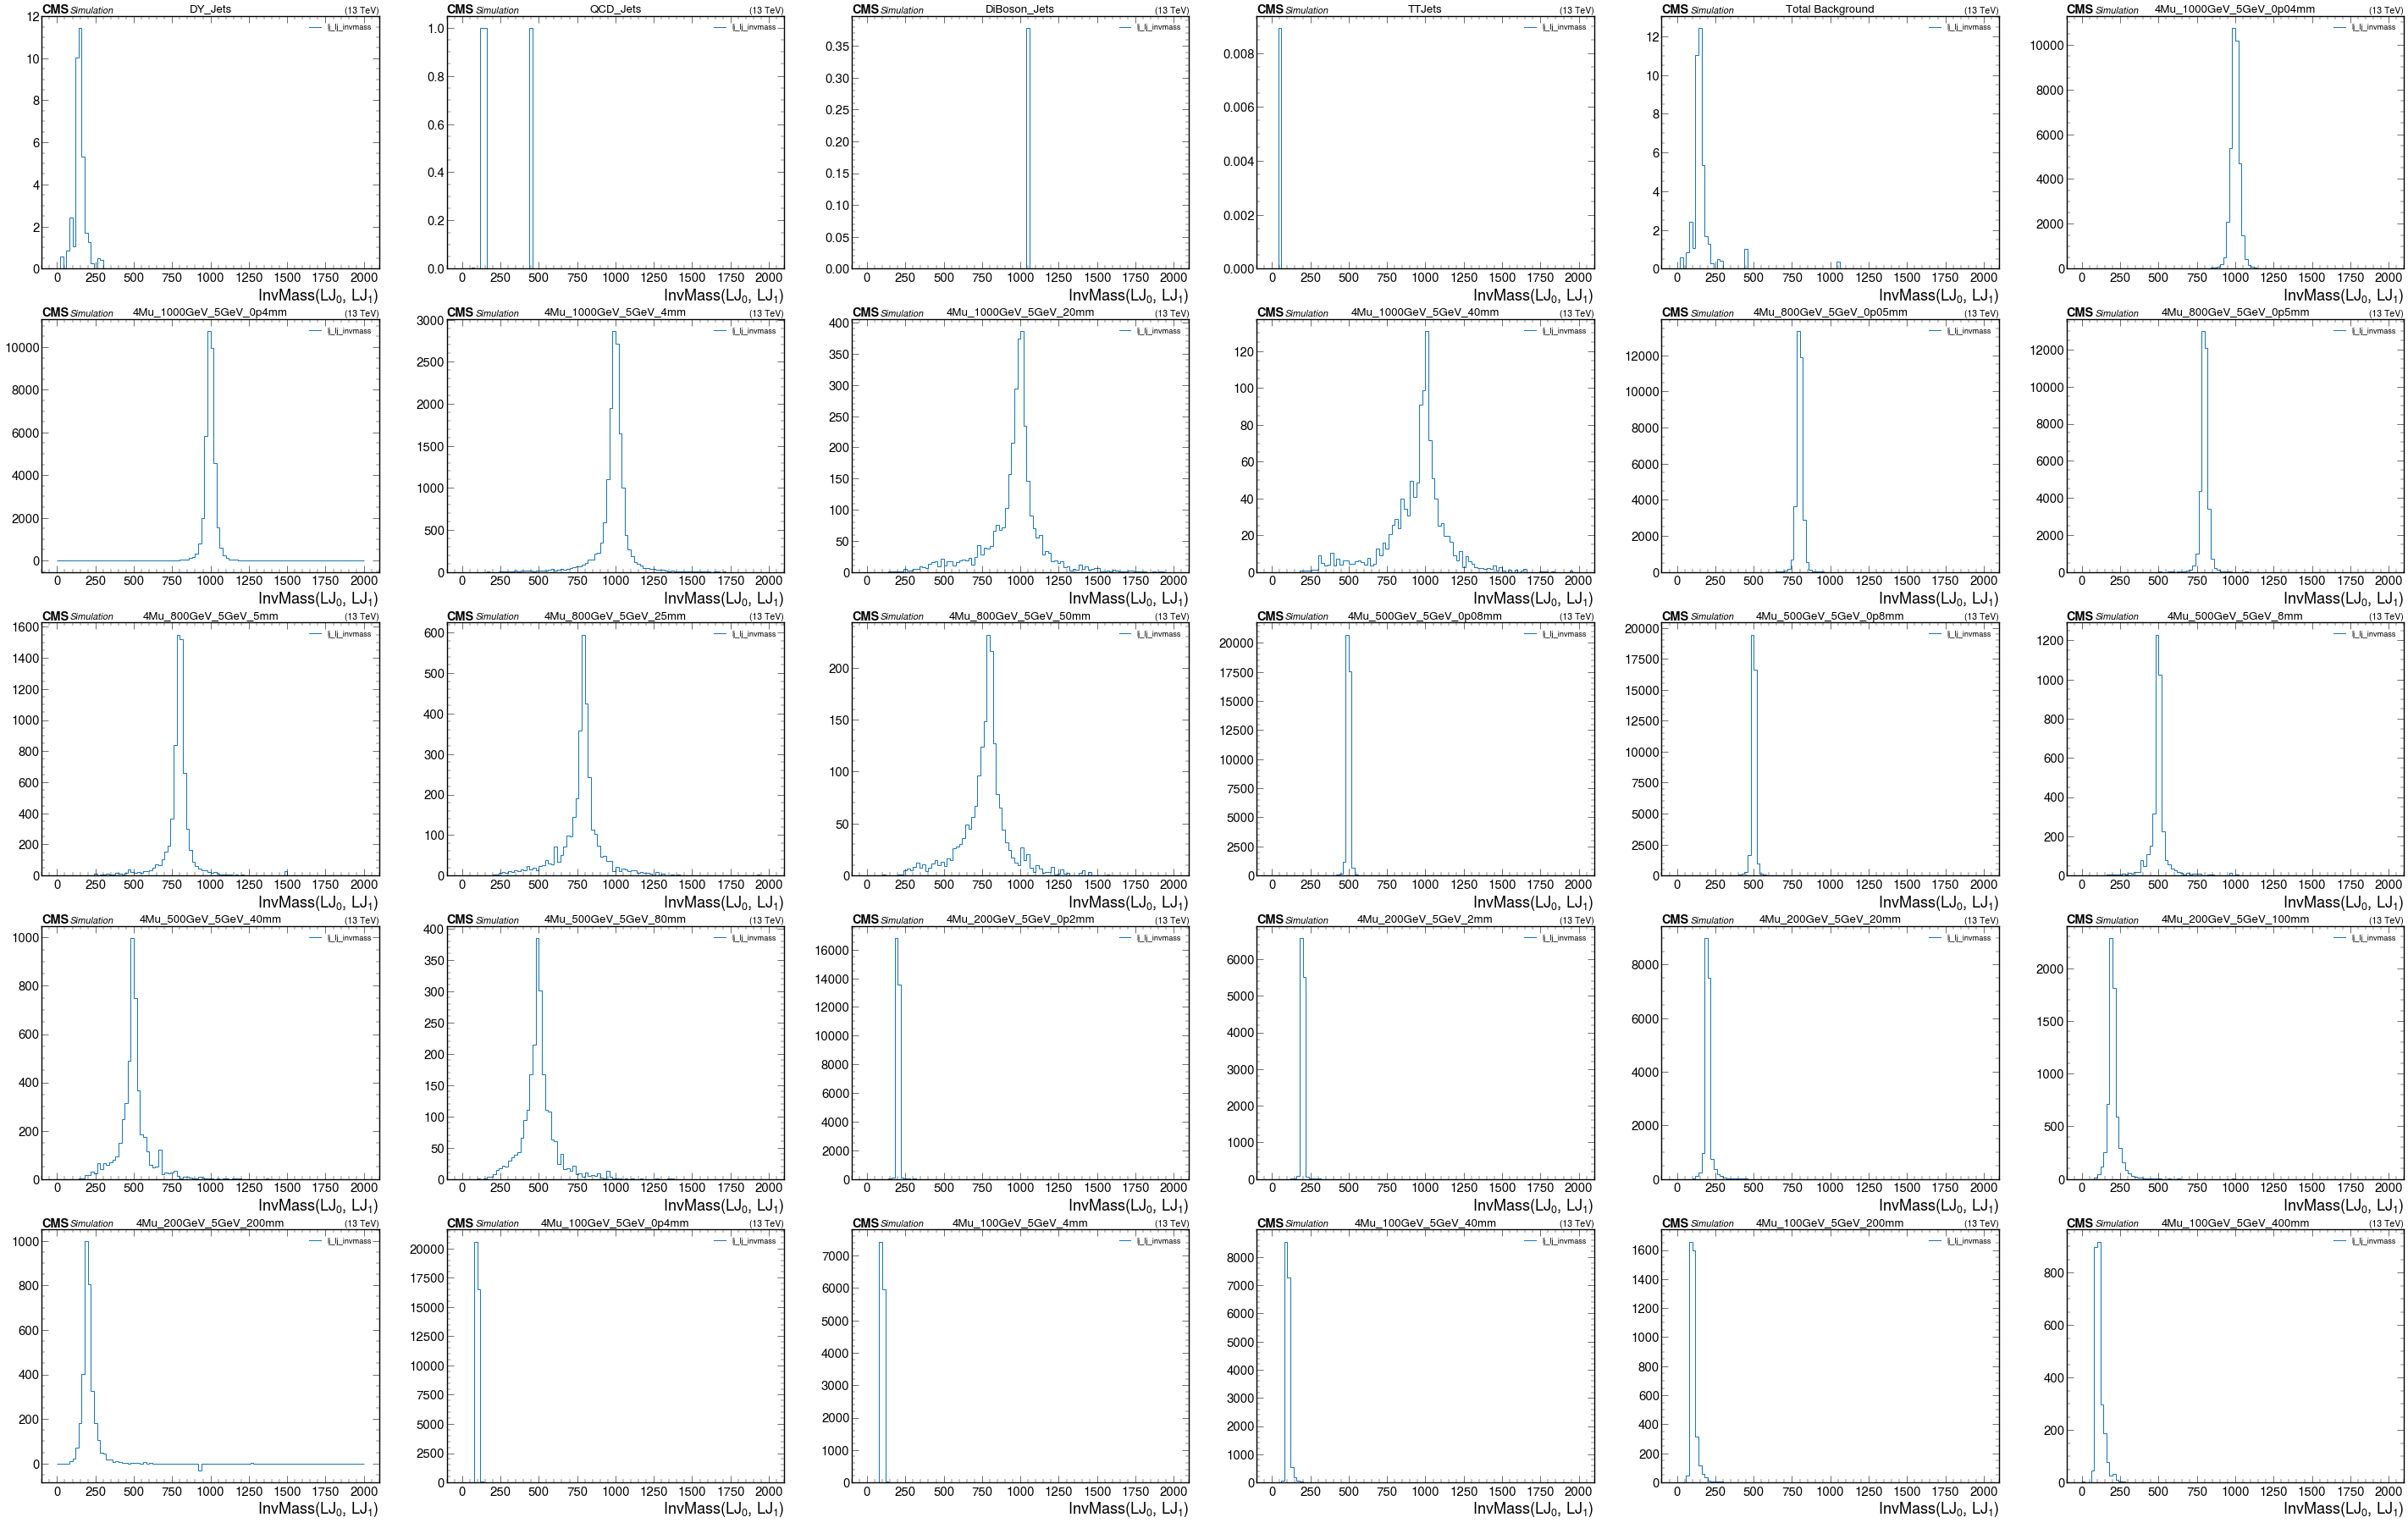

In [9]:
plotSamples(["lj_lj_invmass"], "4mu", False, False, sample_list)

In [10]:
#plotSamples(["lj_pfIsolation07"], "baseNoLj", False, True, sample_list)

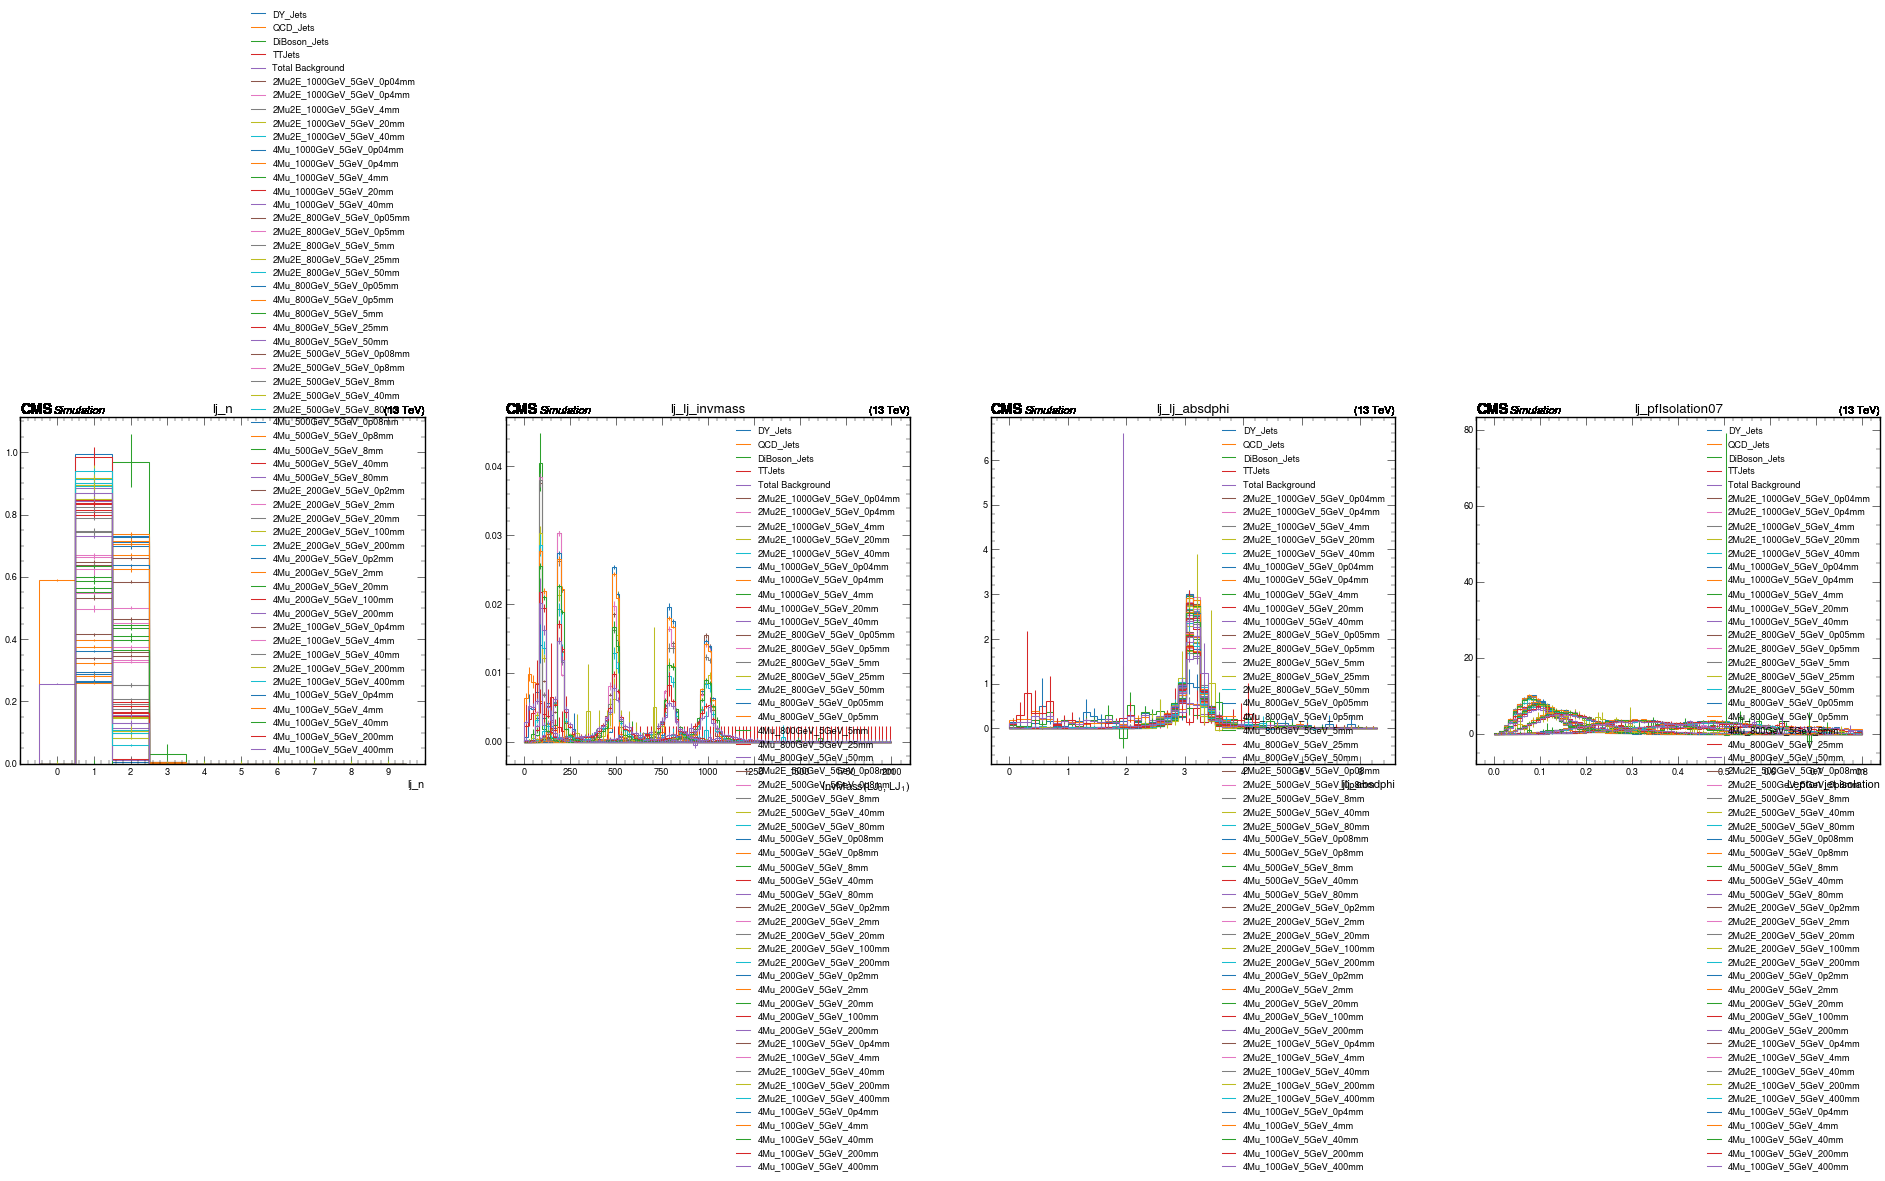

In [11]:
plotHists(["lj_n", "lj_lj_invmass", "lj_lj_absdphi", "lj_pfIsolation07"], "baseNoLj", True, True, sample_list)

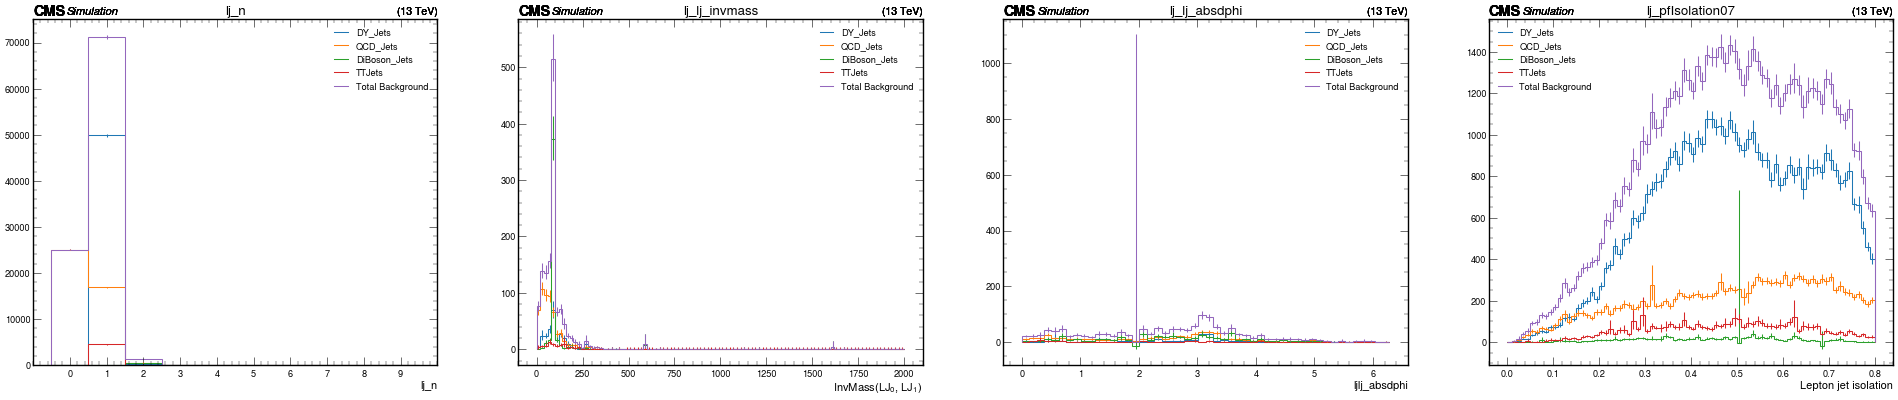

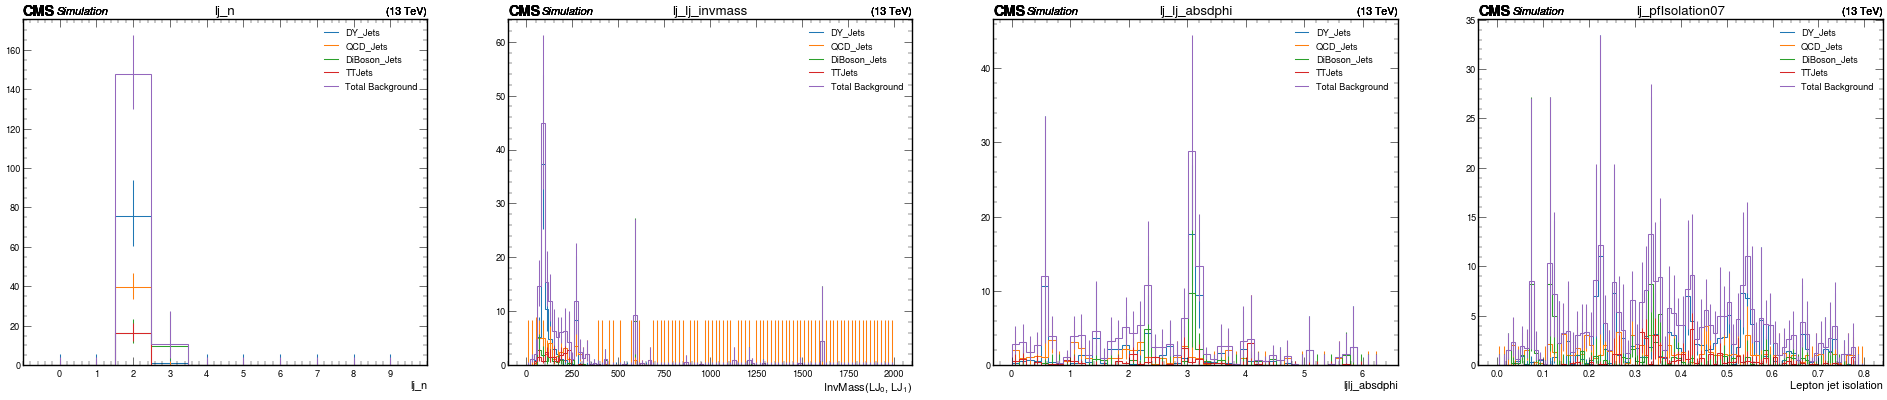

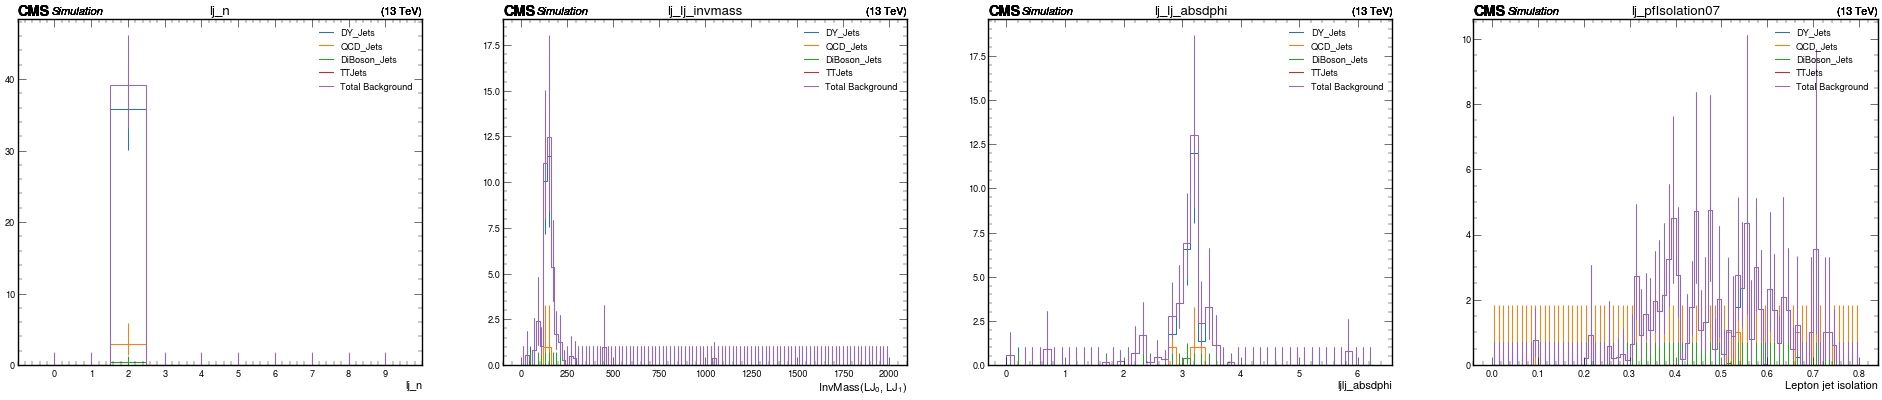

In [12]:
temp = ["DY_Jets", "QCD_Jets", "DiBoson_Jets", "TTJets", "Total Background"]
plotHists(["lj_n", "lj_lj_invmass", "lj_lj_absdphi", "lj_pfIsolation07"], "baseNoLj", True, False, temp)

plotHists(["lj_n", "lj_lj_invmass", "lj_lj_absdphi", "lj_pfIsolation07"], "2mu2e", True, False, temp)

plotHists(["lj_n", "lj_lj_invmass", "lj_lj_absdphi", "lj_pfIsolation07"], "4mu", True, False, temp)

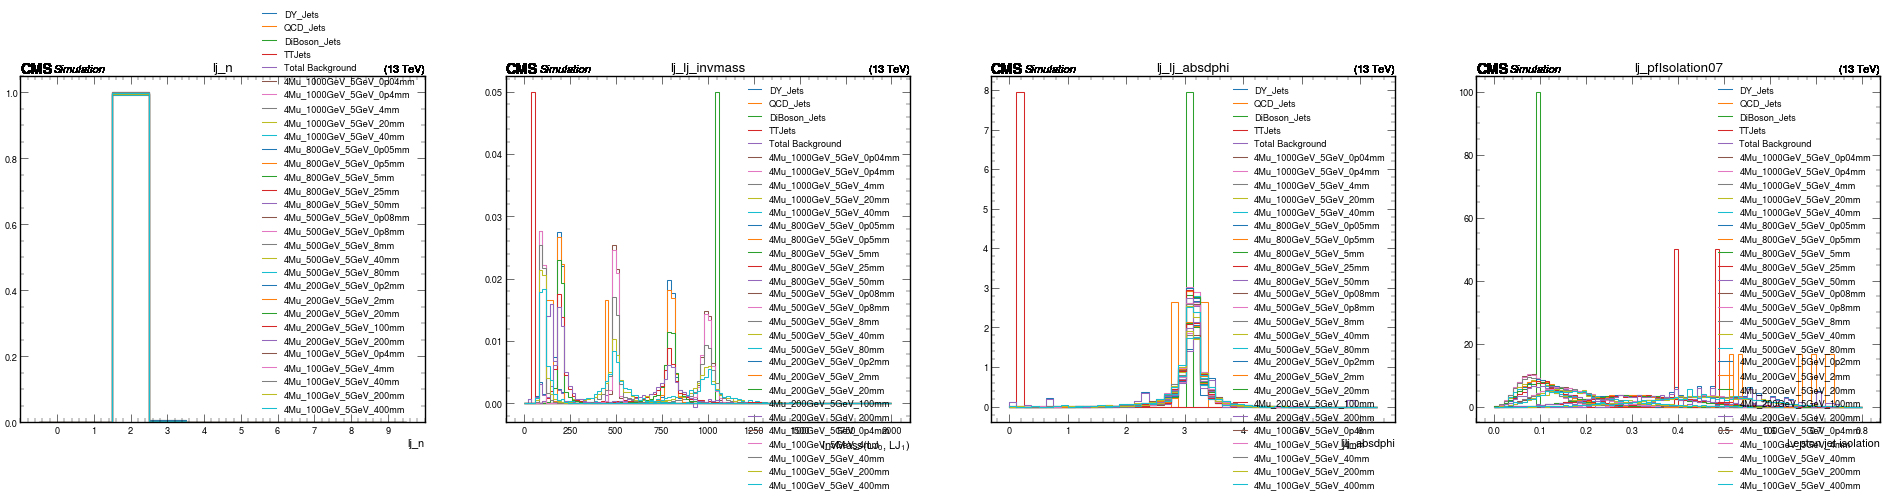

In [13]:
for sample in SIDM_4Mu_samples:
    temp.append(sample)
plotHists(["lj_n", "lj_lj_invmass", "lj_lj_absdphi", "lj_pfIsolation07"], "4mu", False, True, temp)

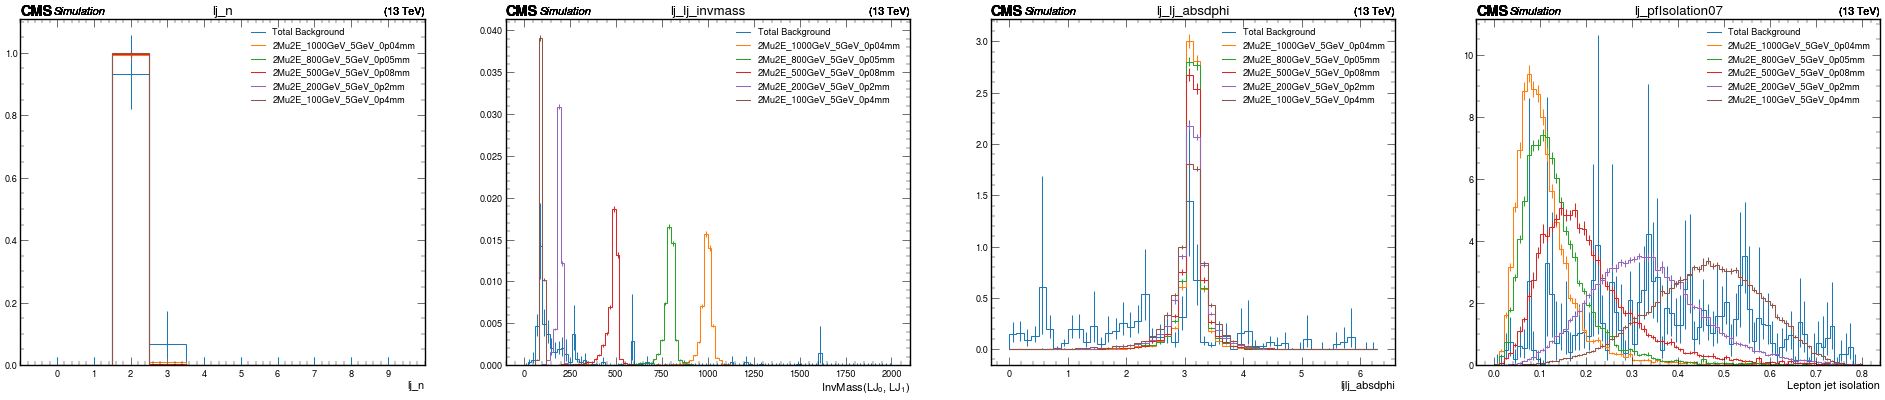

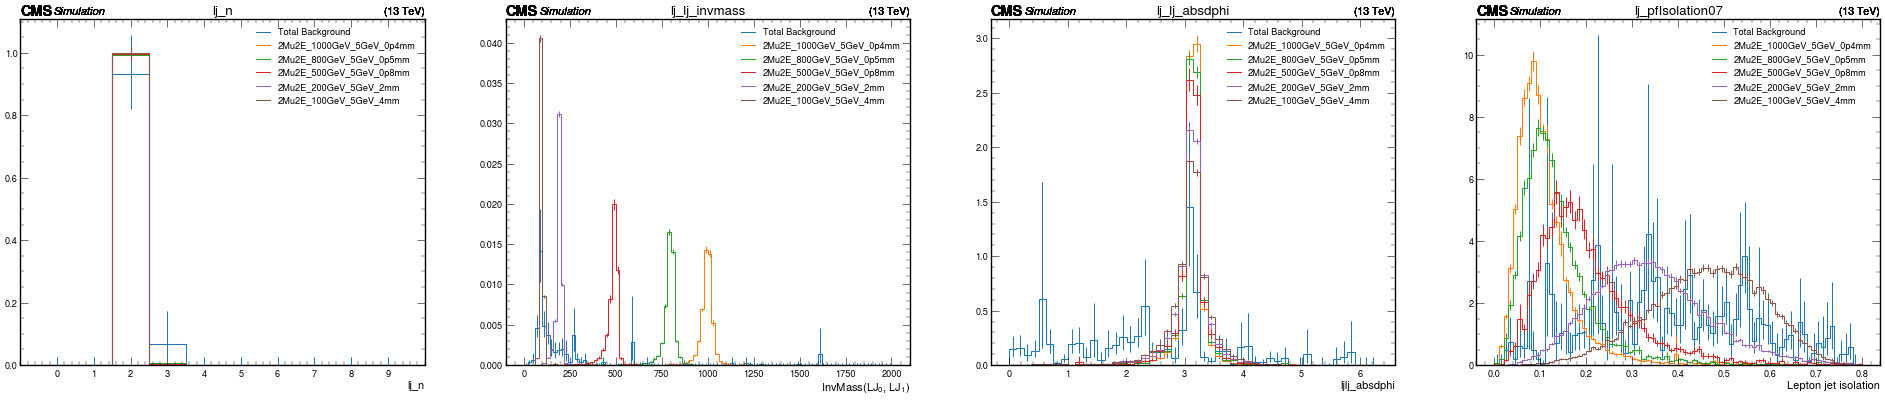

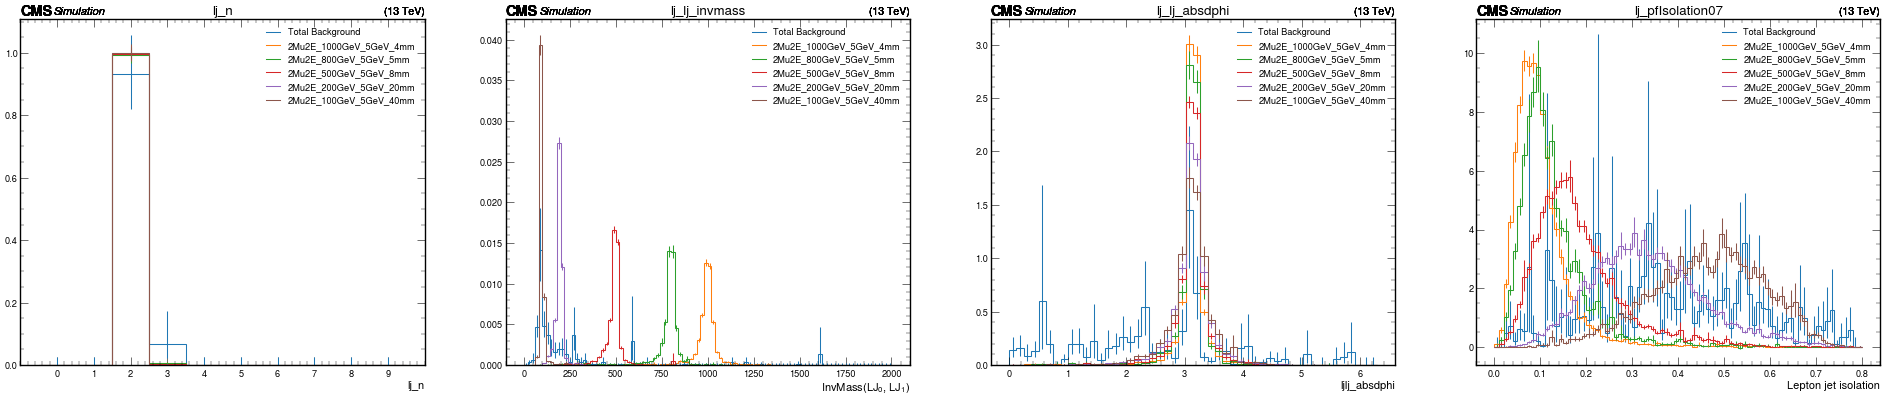

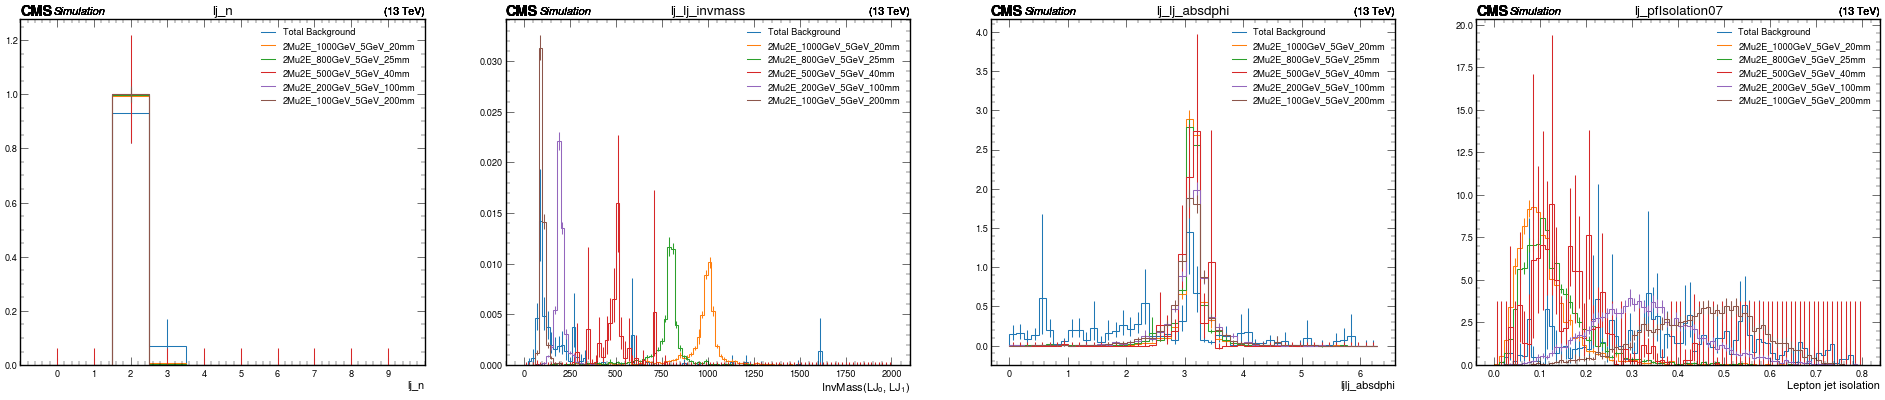

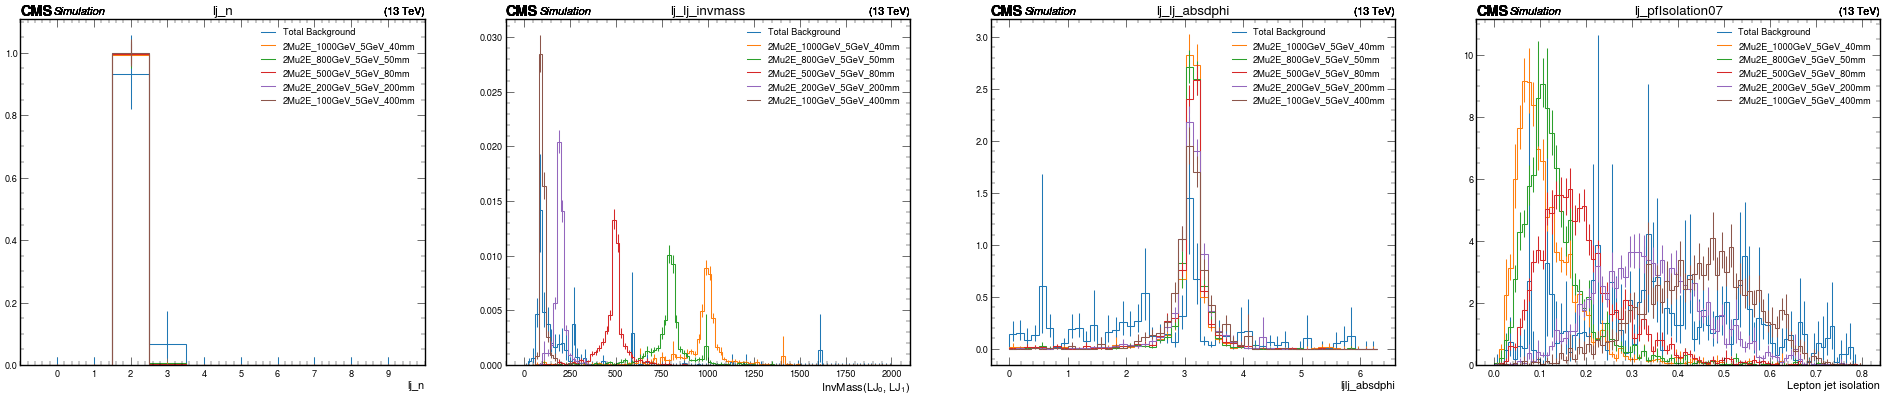

In [14]:
temp_list = [
    SIDM_2Mu2E_samples_prompt,
    SIDM_2Mu2E_samples_midprmt,
    SIDM_2Mu2E_samples_mid,
    SIDM_2Mu2E_samples_middisp,
    SIDM_2Mu2E_samples_displaced,
]
for sample_list in temp_list:
    temp = []
    temp.append("Total Background")
    for sample in sample_list:
        temp.append(sample)
    plotHists(["lj_n", "lj_lj_invmass", "lj_lj_absdphi", "lj_pfIsolation07"], "2mu2e", True, True, temp)

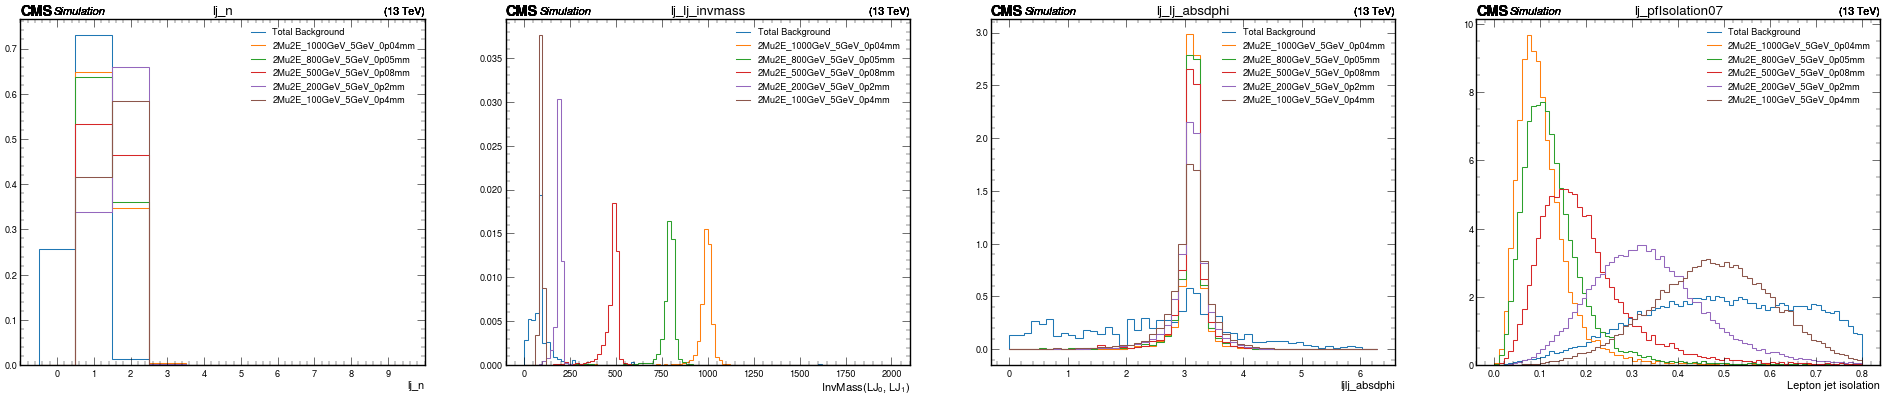

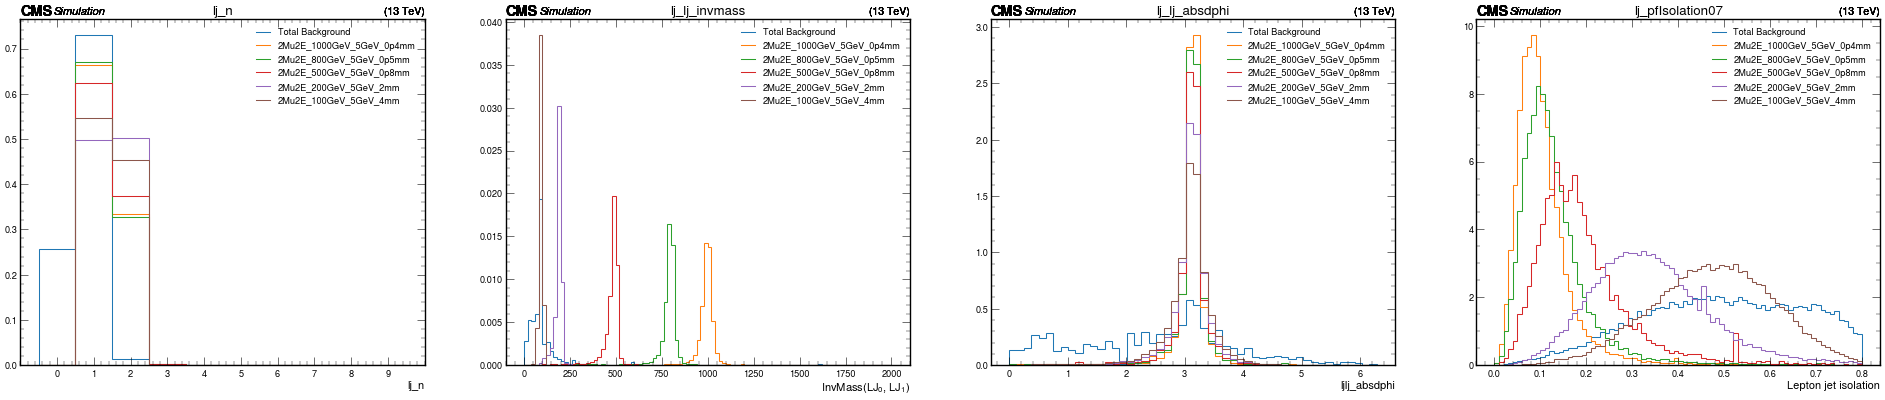

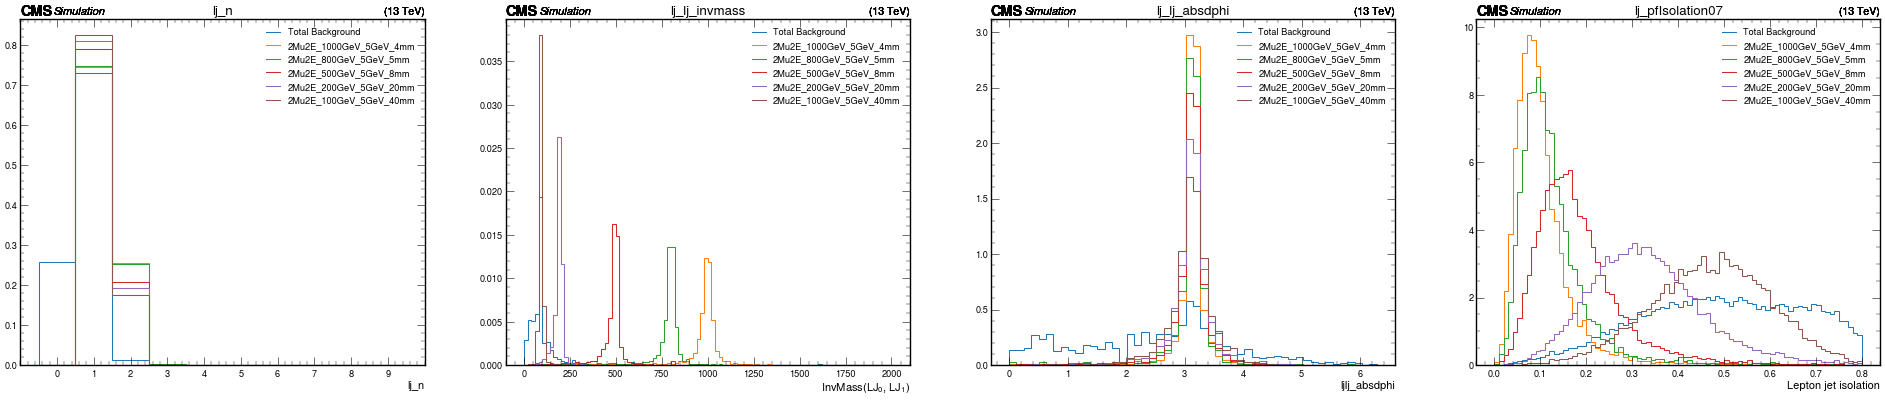

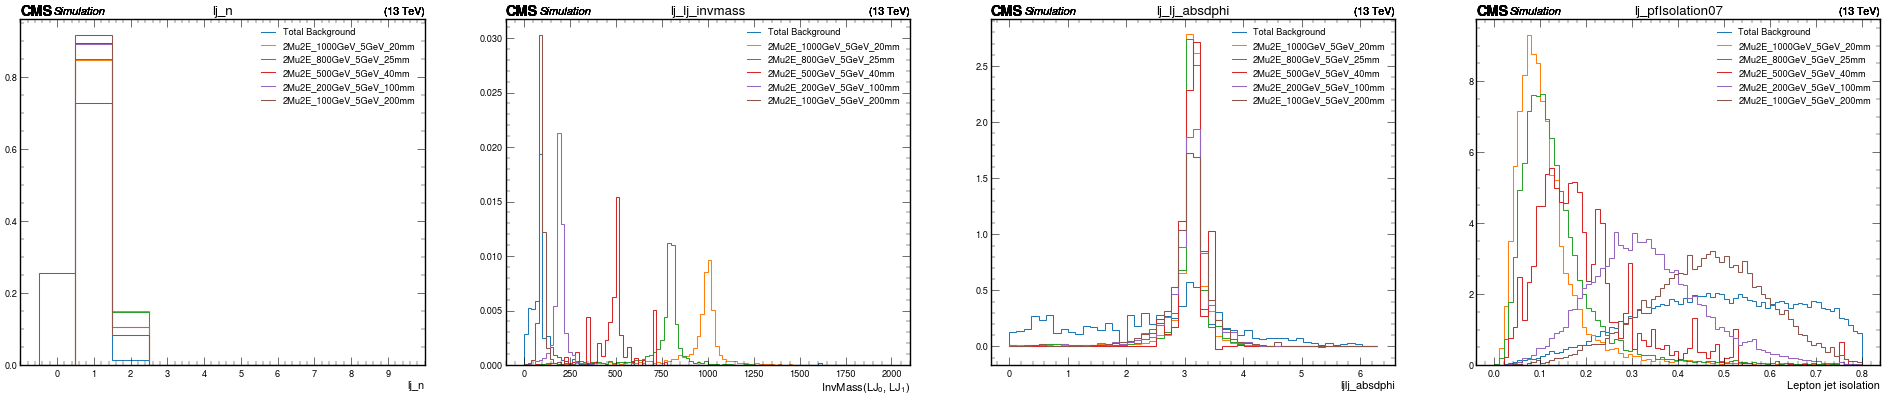

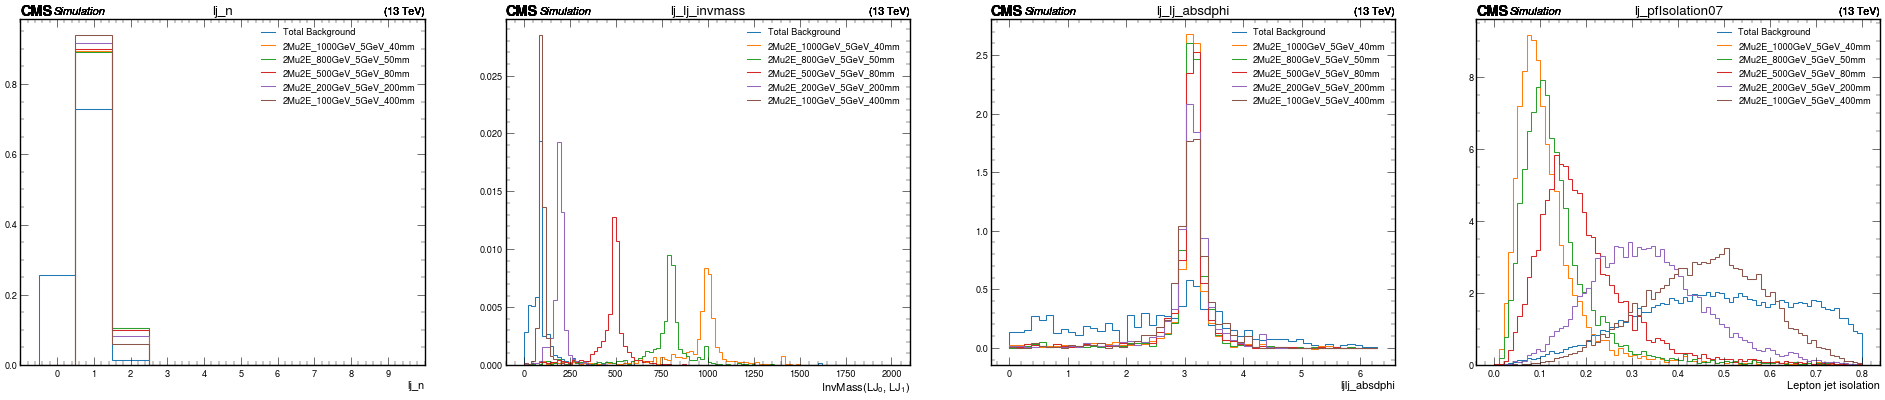

In [15]:
temp_list = [
    SIDM_2Mu2E_samples_prompt,
    SIDM_2Mu2E_samples_midprmt,
    SIDM_2Mu2E_samples_mid,
    SIDM_2Mu2E_samples_middisp,
    SIDM_2Mu2E_samples_displaced,
]
for sample_list in temp_list:
    temp = []
    temp.append("Total Background")
    for sample in sample_list:
        temp.append(sample)
    plotHists(["lj_n", "lj_lj_invmass", "lj_lj_absdphi", "lj_pfIsolation07"], "baseNoLj", False, True, temp)

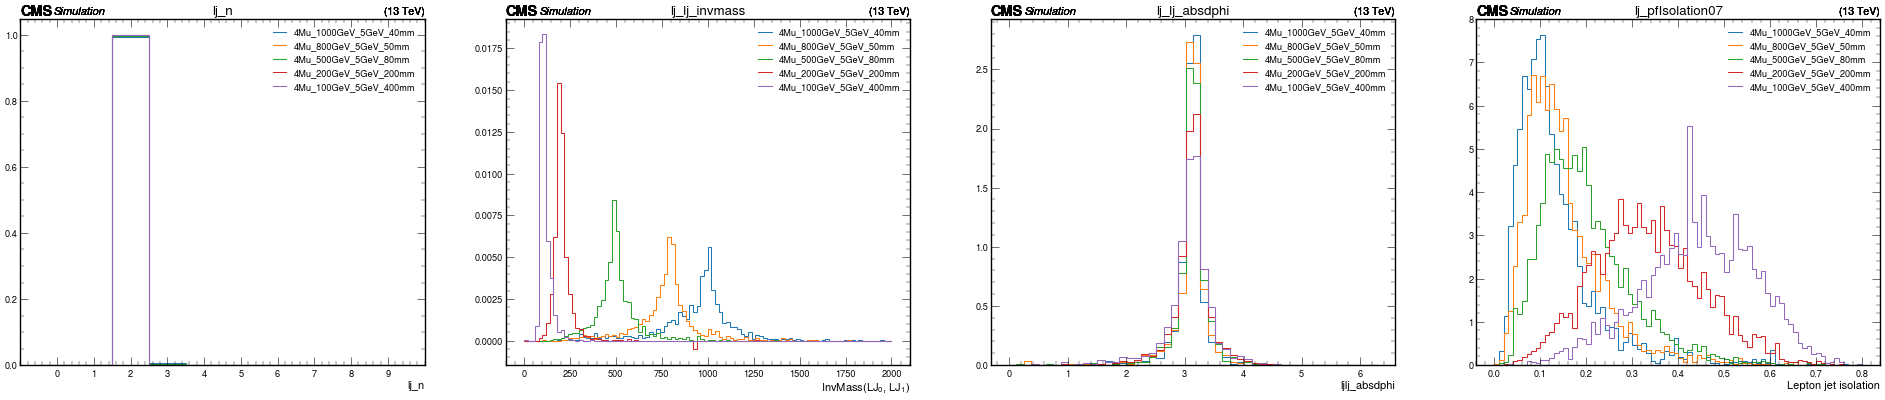

In [16]:
plotHists(["lj_n", "lj_lj_invmass", "lj_lj_absdphi", "lj_pfIsolation07"], "4mu", False, True, SIDM_4Mu_samples_displaced, False)

In [17]:
out[SIDM_4Mu_samples_displaced[0]]["cutflow"]["4mu"].print_table(fraction=True)

cut name        individual %    marginal %    cumulative %
------------  --------------  ------------  --------------
No selection           100.0         100.0           100.0
PV filter              100.0         100.0           100.0
Cosmic veto             99.8          99.8            99.8
>=2 LJs                  9.8           9.8             9.7
4mu                      8.9          91.3             8.9


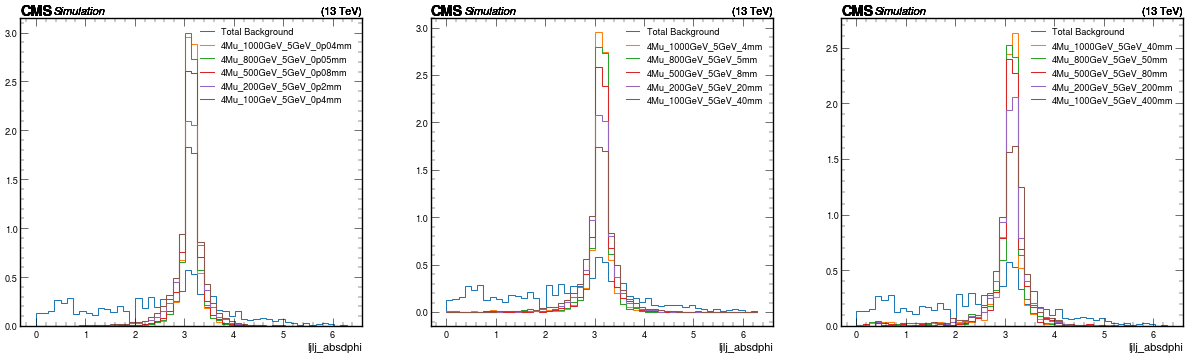

In [18]:
temp1 = []
leg1 = ["Total Background"]
for sample in SIDM_4Mu_samples_prompt:
    temp1.append(sample)
    leg1.append(sample)
temp2 = []
leg2 = ["Total Background"]
for sample in SIDM_4Mu_samples_mid:
    temp2.append(sample)
    leg2.append(sample)
temp3 = []
leg3 = ["Total Background"]
for sample in SIDM_4Mu_samples_displaced:
    temp3.append(sample)
    leg3.append(sample)
plt.subplots(1, 3, figsize=(30, 8))

hist = "lj_lj_absdphi"

plt.subplot(1, 3, 1)
utilities.plot(bg_Hists[hist]["baseNoLj", :], yerr=False, density=True, flow='none')    
for sample in temp1:
    utilities.plot(out[sample]["hists"][hist]["baseNoLj", :], yerr=False, density=True, flow='none')
plt.legend(leg1)


plt.subplot(1, 3, 2)
utilities.plot(bg_Hists[hist]["baseNoLj", :], yerr=False, density=True, flow='none')   
for sample in temp2:
    utilities.plot(out[sample]["hists"][hist]["baseNoLj", :], yerr=False, density=True, flow='none')
plt.legend(leg2)


plt.subplot(1, 3, 3)
utilities.plot(bg_Hists[hist]["baseNoLj", :], yerr=False, density=True, flow='none')   
for sample in temp3:
    utilities.plot(out[sample]["hists"][hist]["baseNoLj", :], yerr=False, density=True, flow='none')
plt.legend(leg3)

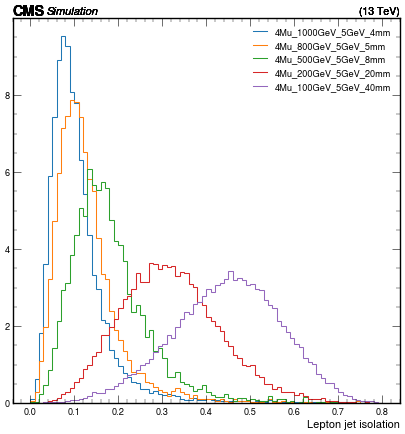

In [19]:
for sample in SIDM_4Mu_samples_mid:
    utilities.plot(out[sample]["hists"]["lj_pfIsolation07"]["baseNoLj", :], yerr=False, density=True, flow='none')
plt.legend(SIDM_4Mu_samples_mid)

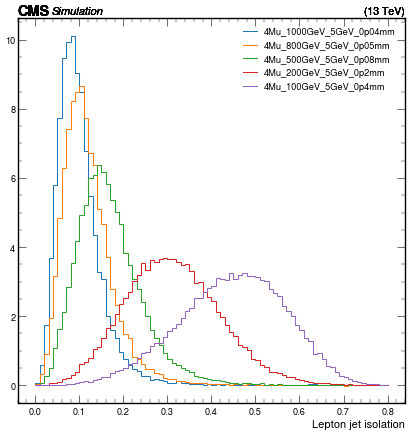

In [20]:
for sample in SIDM_4Mu_samples_prompt:
    utilities.plot(out[sample]["hists"]["lj_pfIsolation07"]["baseNoLj", :], yerr=False, density=True, flow='none')
plt.legend(SIDM_4Mu_samples_prompt)

In [21]:
bg_Cutflow["4mu"].print_table(fraction=True)

cut name        individual %    marginal %    cumulative %
------------  --------------  ------------  --------------
No selection           100.0         100.0           100.0
PV filter              100.0         100.0           100.0
Cosmic veto            100.0         100.0           100.0
>=2 LJs                  0.7           0.7             0.7
4mu                      0.0           5.9             0.0


In [22]:
init_sample = SIDM_4Mu_samples_displaced[0]
samples_used = [init_sample]
init_cutflow = out[init_sample]["cutflow"]["4mu"]
cutflows_displaced = []
for sample in SIDM_4Mu_samples_displaced[1:]:
    samples_used.append(sample)
    cutflows_displaced.append(out[sample]["cutflow"]["4mu"])

init_cutflow.print_multi_table(cutflows_displaced, samples_used, True)

cut name                     % cuts:                 % cuts:                 % cuts:                  % cuts:                  % cuts:
                4Mu_1000GeV_5GeV_40mm    4Mu_800GeV_5GeV_50mm    4Mu_500GeV_5GeV_80mm    4Mu_200GeV_5GeV_200mm    4Mu_100GeV_5GeV_400mm
------------  -----------------------  ----------------------  ----------------------  -----------------------  -----------------------
No selection                    100.0                   100.0                   100.0                    100.0                    100.0
PV filter                       100.0                   100.0                   100.0                    100.0                    100.0
Cosmic veto                      99.8                    99.8                    99.8                     99.9                     99.9
>=2 LJs                           9.7                    11.2                    12.7                     15.0                     10.8
4mu                               8.9            

In [23]:
samples_used = []
cutflows_used = []
samples_used.append("Background")
init_cutflow = bg_Cutflow["4mu"]
headers = ["Background"]
for sample in SIDM_4Mu_samples_displaced:
    if sample[0] == '2' or sample[0] == '4':
        samples_used.append(sample)
        headers.append("SIDM_" + sample.split("_")[1] + "_" + sample.split("_")[-1])
        cutflows_used.append(out[sample]["cutflow"]["4mu"])
if samples_used[0][0] == 2 or samples_used == 4:
    cutflows_used.remove(out[init_sample]["cutflow"]["4mu"])

init_cutflow.print_multi_table(cutflows_used, headers, True)

cut name          % cuts:              % cuts:             % cuts:             % cuts:              % cuts:              % cuts:
                Background    SIDM_1000GeV_40mm    SIDM_800GeV_50mm    SIDM_500GeV_80mm    SIDM_200GeV_200mm    SIDM_100GeV_400mm
------------  ------------  -------------------  ------------------  ------------------  -------------------  -------------------
No selection         100.0                100.0               100.0               100.0                100.0                100.0
PV filter            100.0                100.0               100.0               100.0                100.0                100.0
Cosmic veto          100.0                 99.8                99.8                99.8                 99.9                 99.9
>=2 LJs                0.7                  9.7                11.2                12.7                 15.0                 10.8
4mu                    0.0                  8.9                10.3                12.0    

In [24]:
SIDM_4Mu_dispGroups = [
    SIDM_4Mu_samples_prompt,
    SIDM_4Mu_samples_midprmt,
    SIDM_4Mu_samples_mid,
    SIDM_4Mu_samples_middisp,
    SIDM_4Mu_samples_displaced
]
titles = [
    "SIDM_4Mu_samples_prompt",
    "SIDM_4Mu_samples_midprmp",
    "SIDM_4Mu_samples_mid",
    "SIDM_4Mu_samples_middisp",
    "SIDM_4Mu_samples_displaced",
]
count = 0
for histList in SIDM_4Mu_dispGroups:
    samples_used = []
    cutflows_used = []
    headers = []
    samples_used.append("Background")
    init_cutflow = bg_Cutflow["4mu"]
    headers = ["Background"]
    for sample in histList:
        if sample[0] == '2' or sample[0] == '4':
            samples_used.append(sample)
            headers.append("SIDM_" + sample.split("_")[1] + "_" + sample.split("_")[-1])
            cutflows_used.append(out[sample]["cutflow"]["4mu"])
    if samples_used[0][0] == 2 or samples_used == 4:
        cutflows_used.remove(out[init_sample]["cutflow"]["4mu"])
    init_cutflow.print_multi_table(cutflows_used, headers, True, False, titles[count])
    count = count+1

SIDM_4Mu_samples_prompt
-------------------------------------------------------------------------------------------------------------------------------------
cut name          % cuts:                % cuts:               % cuts:               % cuts:              % cuts:              % cuts:
                Background    SIDM_1000GeV_0p04mm    SIDM_800GeV_0p05mm    SIDM_500GeV_0p08mm    SIDM_200GeV_0p2mm    SIDM_100GeV_0p4mm
------------  ------------  ---------------------  --------------------  --------------------  -------------------  -------------------
No selection         100.0                  100.0                 100.0                 100.0                100.0                100.0
PV filter            100.0                  100.0                 100.0                 100.0                100.0                100.0
Cosmic veto          100.0                   99.8                  99.8                  99.8                 99.8                 99.8
>=2 LJs                0.7 

In [25]:
SIDM_2Mu2E_dispGroups = [
    SIDM_2Mu2E_samples_prompt,
    SIDM_2Mu2E_samples_midprmt,
    SIDM_2Mu2E_samples_mid,
    SIDM_2Mu2E_samples_middisp,
    SIDM_2Mu2E_samples_displaced
]
titles = [
    "SIDM_2Mu2E_samples_prompt",
    "SIDM_2Mu2E_samples_midprmp",
    "SIDM_2Mu2E_samples_mid",
    "SIDM_2Mu2E_samples_middisp",
    "SIDM_2Mu2E_samples_displaced",
]
count = 0
for histList in SIDM_2Mu2E_dispGroups:
    samples_used = []
    cutflows_used = []
    headers = []
    samples_used.append("Background")
    init_cutflow = bg_Cutflow["2mu2e"]
    headers = ["Background"]
    for sample in histList:
        if sample[0] == '2' or sample[0] == '4':
            samples_used.append(sample)
            headers.append("SIDM_" + sample.split("_")[1] + "_" + sample.split("_")[-1])
            cutflows_used.append(out[sample]["cutflow"]["2mu2e"])
    if samples_used[0][0] == 2 or samples_used == 4:
        cutflows_used.remove(out[init_sample]["cutflow"]["2mu2e"])
    init_cutflow.print_multi_table(cutflows_used, headers, True, False, titles[count])
    count = count+1

SIDM_2Mu2E_samples_prompt
-------------------------------------------------------------------------------------------------------------------------------------
cut name          % cuts:                % cuts:               % cuts:               % cuts:              % cuts:              % cuts:
                Background    SIDM_1000GeV_0p04mm    SIDM_800GeV_0p05mm    SIDM_500GeV_0p08mm    SIDM_200GeV_0p2mm    SIDM_100GeV_0p4mm
------------  ------------  ---------------------  --------------------  --------------------  -------------------  -------------------
No selection         100.0                  100.0                 100.0                 100.0                100.0                100.0
PV filter            100.0                  100.0                 100.0                 100.0                100.0                100.0
Cosmic veto          100.0                  100.0                 100.0                  99.9                 99.9                100.0
>=2 LJs                0.

In [26]:
cutflows_used = []
if 1:
    cutflows_used.append(DY_Cutflow["2mu2e"])
    cutflows_used.append(QCD_Cutflow["2mu2e"])
    cutflows_used.append(DiBoson_Cutflow["2mu2e"])
    cutflows_used.append(TT_Cutflow["2mu2e"])
    cutflows_used.append(bg_Cutflow["4mu"])    
    cutflows_used.append(DY_Cutflow["4mu"])
    cutflows_used.append(QCD_Cutflow["4mu"])
    cutflows_used.append(DiBoson_Cutflow["4mu"])
    cutflows_used.append(TT_Cutflow["4mu"])
init_cutflow = bg_Cutflow["2mu2e"]
headers = [
        "Bg 2mu2e", "DY 2mu2e", "QCD 2mu2e", "DB 2mu2e", "TTbar 2mu2e", "Bg 4mu", "DY 4mu", "QCD 4mu", "DB 4mu", "TTbar 4mu"
]
init_cutflow.print_multi_table(cutflows_used, headers, False, False)
init_cutflow.print_multi_table(cutflows_used, headers, True, False)

cut name        Total cuts:     Total cuts:     Total cuts:     Total cuts:     Total cuts:     Total cuts:     Total cuts:     Total cuts:     Total cuts:     Total cuts:
                    Bg 2mu2e        DY 2mu2e       QCD 2mu2e        DB 2mu2e     TTbar 2mu2e          Bg 4mu          DY 4mu         QCD 4mu          DB 4mu       TTbar 4mu
------------  --------------  --------------  --------------  --------------  --------------  --------------  --------------  --------------  --------------  --------------
No selection         97662.2         50149.6         42488.3            61.7          4563.1         97662.2         50149.6         42488.3            61.7          4563.1
PV filter            97662.2         50149.6         42488.3            61.7          4563.1         97662.2         50149.6         42488.3            61.7          4563.1
Cosmic veto          97621.1         50143.9         42454.0            61.7          4561.9         97621.1         50143.9         424

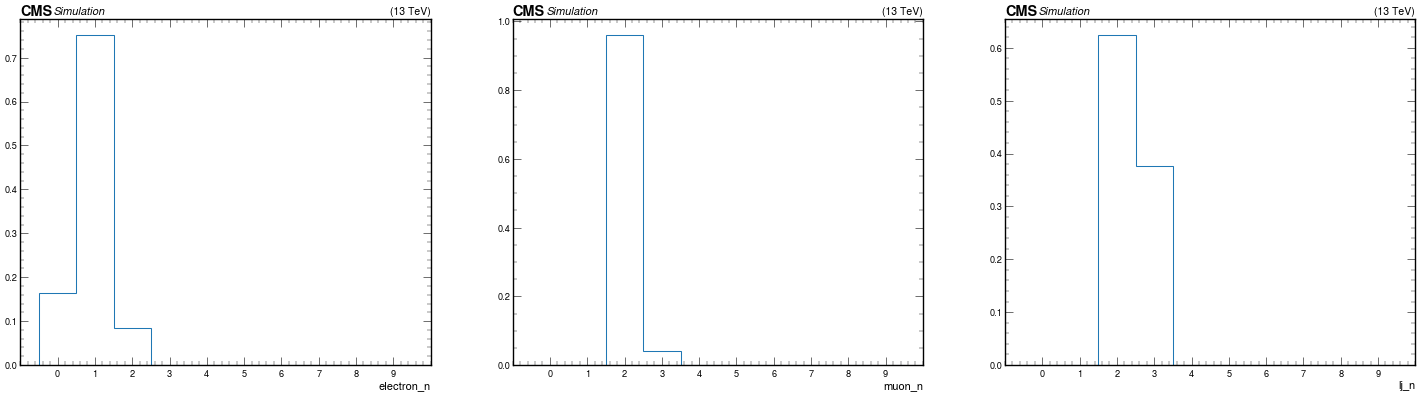

In [27]:
temp = ["electron_n", "muon_n", "lj_n"]
plt.subplots(1, 3, figsize=(36, 9))
for i in range(len(temp)):
    plt.subplot(1, 3, i+1)
    utilities.plot(DiBoson_Hists[temp[i]]["2mu2e", :], yerr=False, density=True, flow='none')

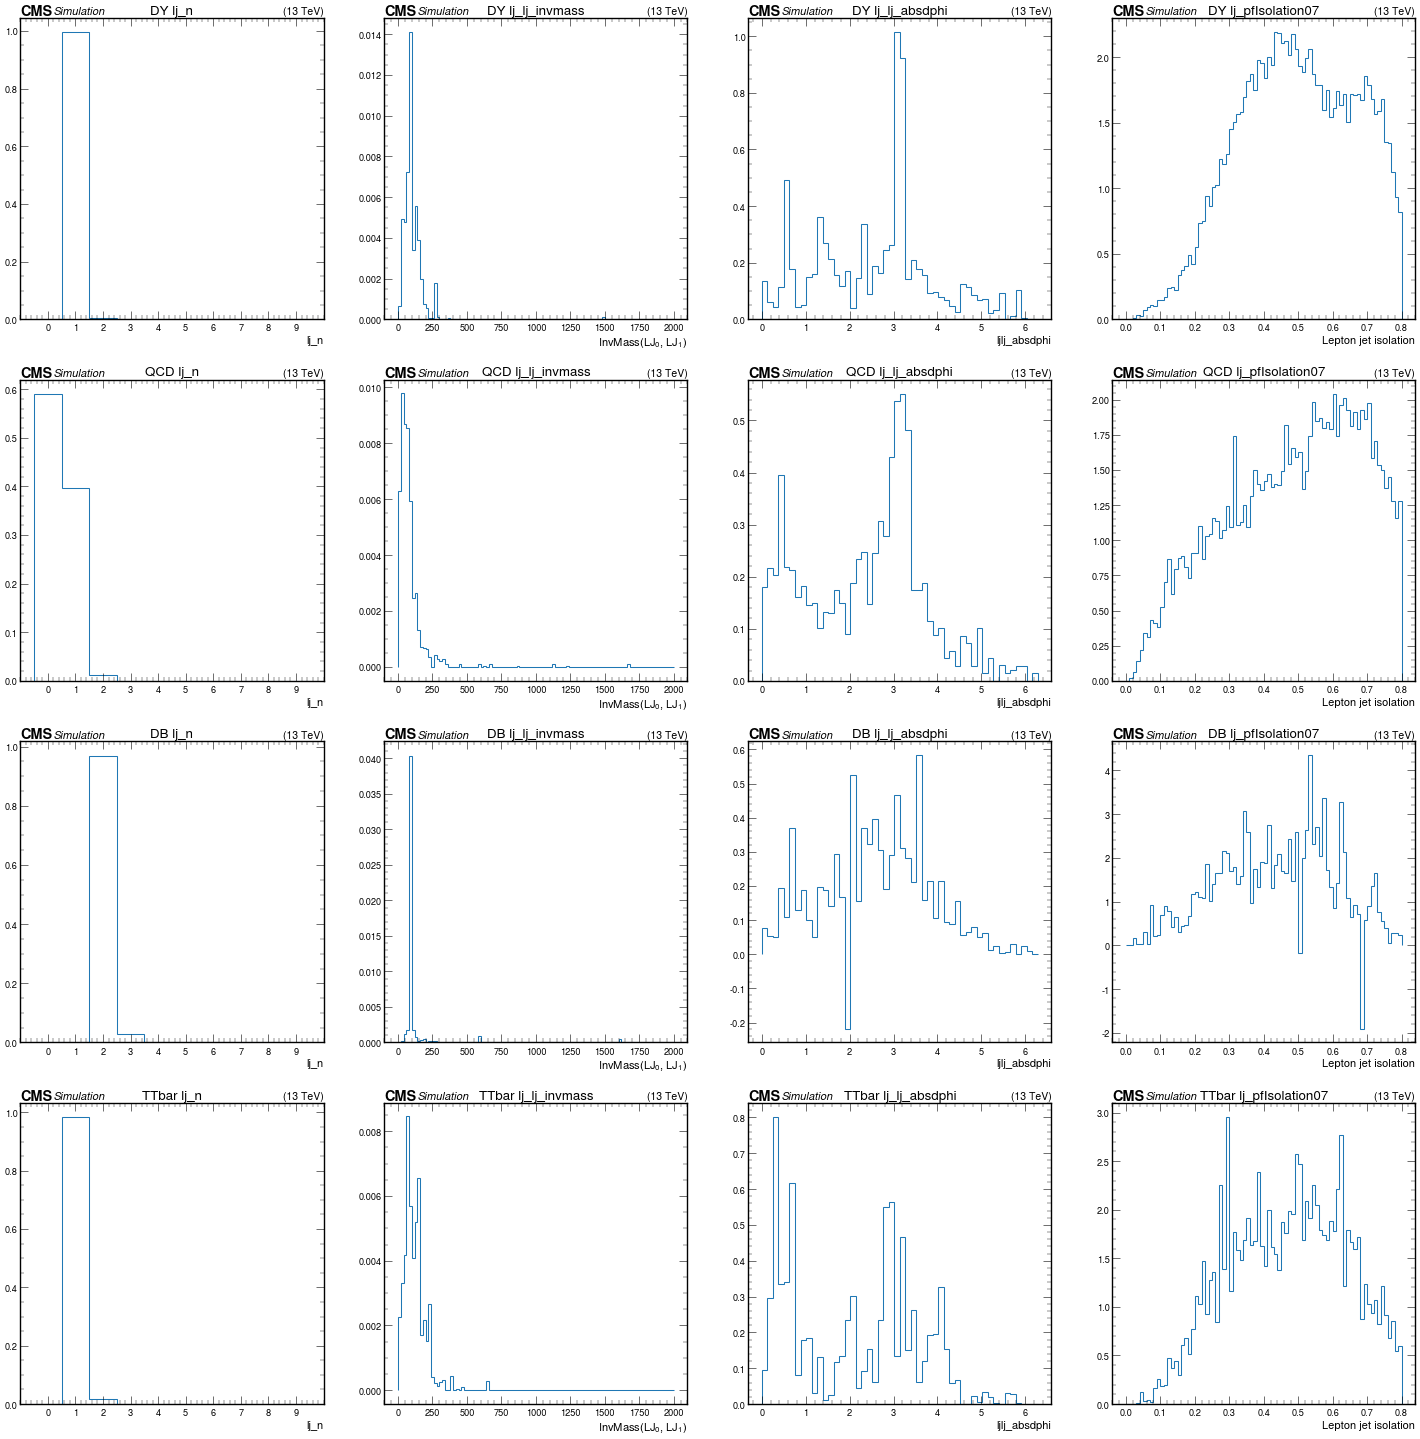

In [28]:
hists = ["lj_n", "lj_lj_invmass", "lj_lj_absdphi", "lj_pfIsolation07"]
titles = ["DY", "QCD", "DB", "TTbar"]
temp = [DY_Hists, QCD_Hists, DiBoson_Hists, TT_Hists]
plt.subplots(len(temp), len(hists), figsize=(36, 9*len(temp)))
for j in range(len(temp)):
    for i in range(len(hists)):
        plt.subplot(len(temp), len(hists), j*len(temp)+i+1)
        utilities.plot(temp[j][hists[i]]["baseNoLj", :], yerr=False, density=True, flow='none')
        plt.title(titles[j] + ' ' + hists[i])

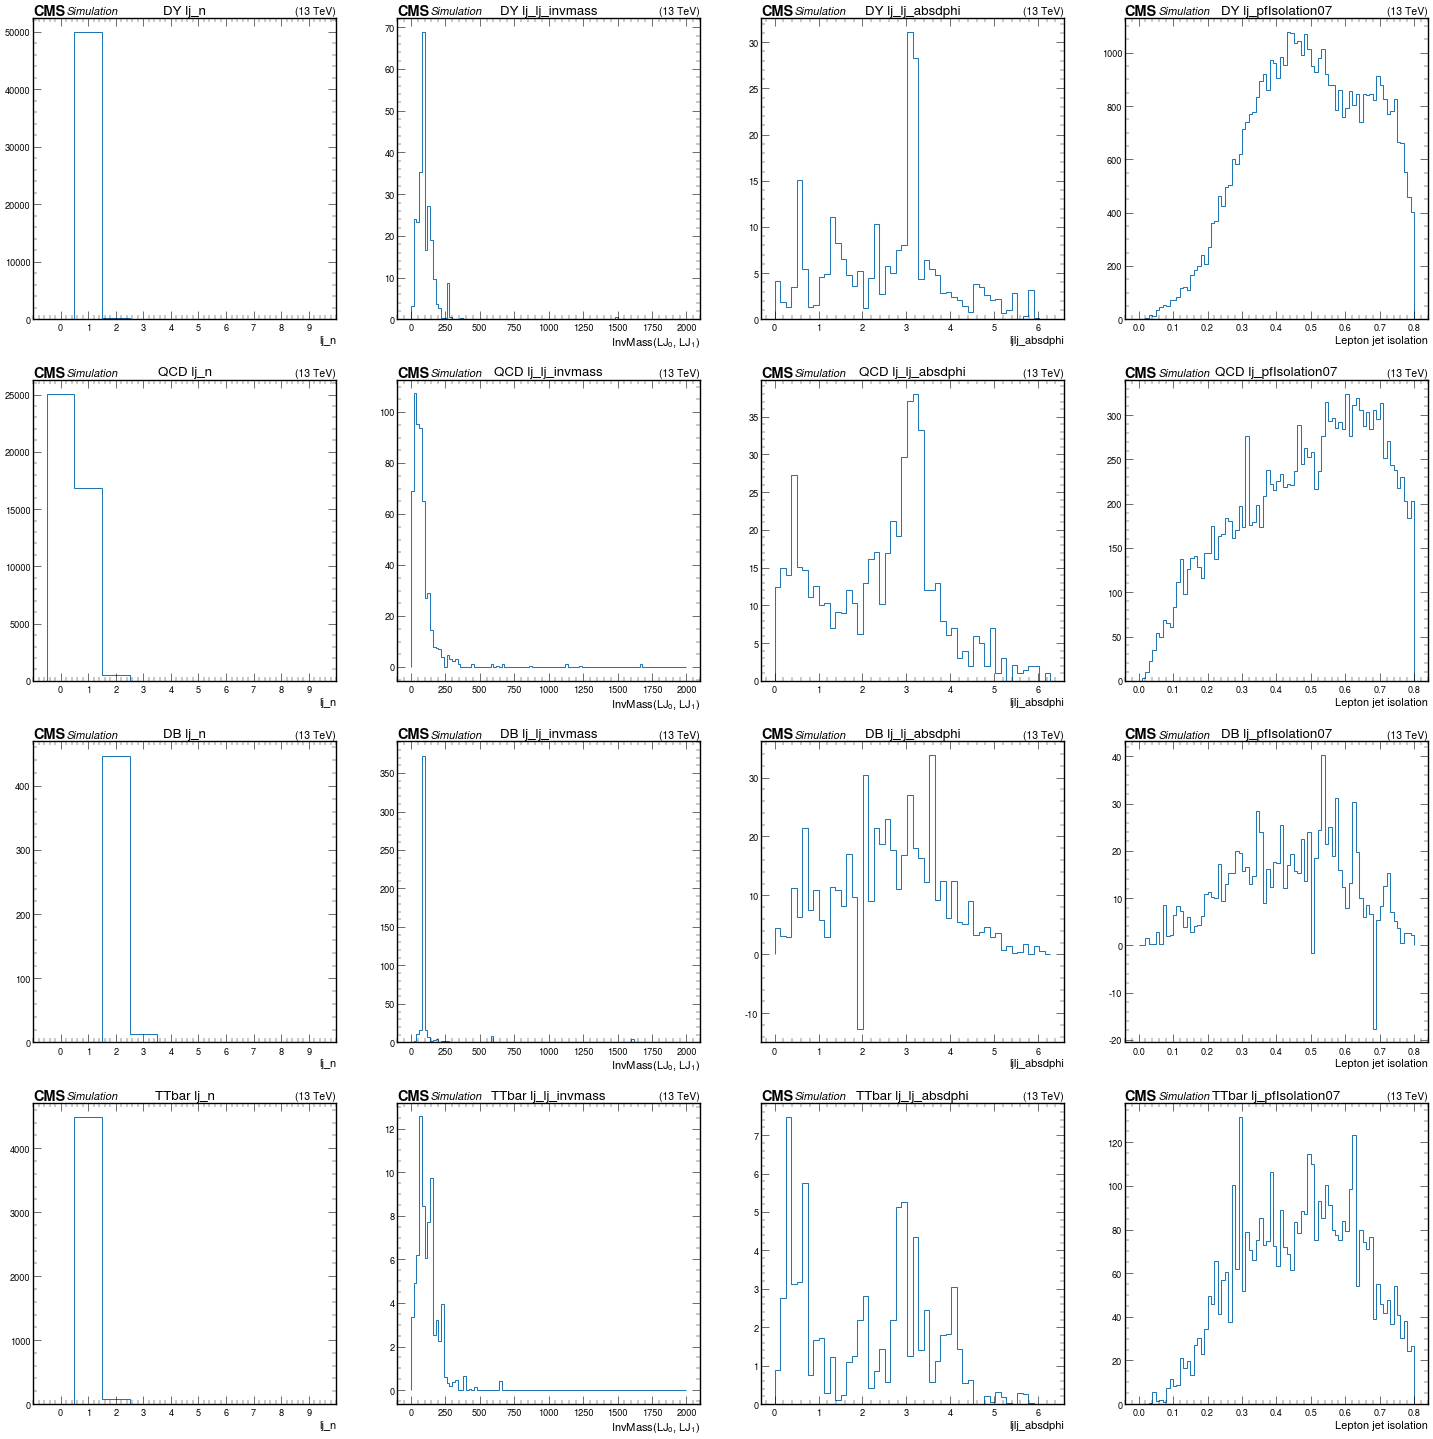

In [29]:
hists = ["lj_n", "lj_lj_invmass", "lj_lj_absdphi", "lj_pfIsolation07"]
titles = ["DY", "QCD", "DB", "TTbar"]
temp = [DY_Hists, QCD_Hists, DiBoson_Hists, TT_Hists]
plt.subplots(len(temp), len(hists), figsize=(36, 9*len(temp)))
for j in range(len(temp)):
    for i in range(len(hists)):
        plt.subplot(len(temp), len(hists), j*len(temp)+i+1)
        utilities.plot(temp[j][hists[i]]["baseNoLj", :], yerr=False, density=False, flow='none')
        plt.title(titles[j] + ' ' + hists[i])

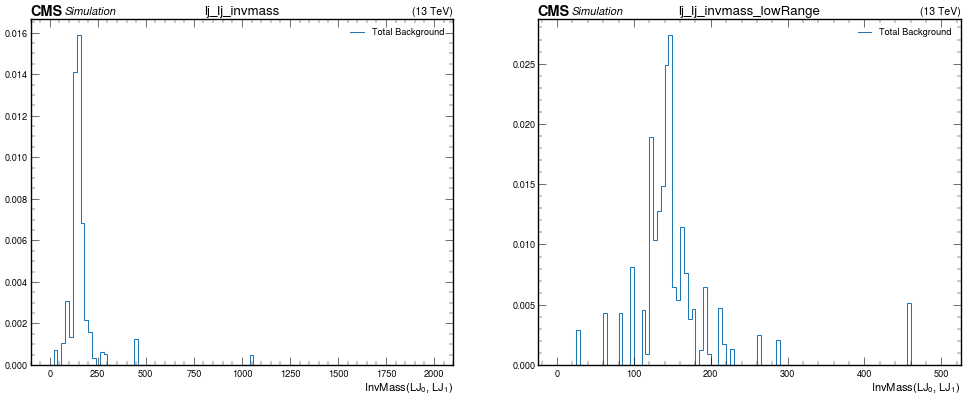

In [30]:
temp = []
temp.append("Total Background")
for sample in sample_list:
    temp.append(sample)
plotHists(["lj_lj_invmass", "lj_lj_invmass_lowRange"], "4mu", False, True, temp)

(0.0, 27.0)

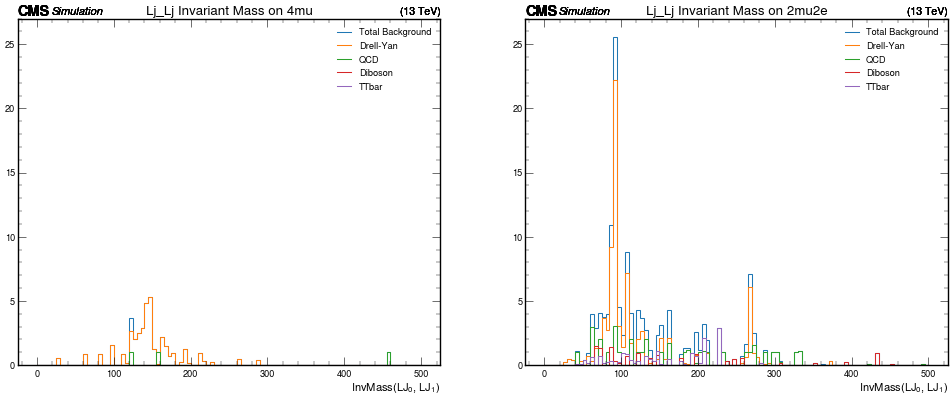

In [31]:
plt.subplots(1,2,figsize=(24,9))
plt.subplot(1,2,1)
utilities.plot(bg_Hists["lj_lj_invmass_lowRange"]["4mu", :], yerr=False, density=False, flow='none')
utilities.plot(DY_Hists["lj_lj_invmass_lowRange"]["4mu", :], yerr=False, density=False, flow='none')
utilities.plot(QCD_Hists["lj_lj_invmass_lowRange"]["4mu", :], yerr=False, density=False, flow='none')
utilities.plot(DiBoson_Hists["lj_lj_invmass_lowRange"]["4mu", :], yerr=False, density=False, flow='none')
utilities.plot(TT_Hists["lj_lj_invmass_lowRange"]["4mu", :], yerr=False, density=False, flow='none')
plt.legend(["Total Background", "Drell-Yan", "QCD", "Diboson", "TTbar"])
plt.title("Lj_Lj Invariant Mass on 4mu")
plt.ylim([0,27])
plt.subplot(1,2,2)
utilities.plot(bg_Hists["lj_lj_invmass_lowRange"]["2mu2e", :], yerr=False, density=False, flow='none')
utilities.plot(DY_Hists["lj_lj_invmass_lowRange"]["2mu2e", :], yerr=False, density=False, flow='none')
utilities.plot(QCD_Hists["lj_lj_invmass_lowRange"]["2mu2e", :], yerr=False, density=False, flow='none')
utilities.plot(DiBoson_Hists["lj_lj_invmass_lowRange"]["2mu2e", :], yerr=False, density=False, flow='none')
utilities.plot(TT_Hists["lj_lj_invmass_lowRange"]["2mu2e", :], yerr=False, density=False, flow='none')
plt.legend(["Total Background", "Drell-Yan", "QCD", "Diboson", "TTbar"])
plt.title("Lj_Lj Invariant Mass on 2mu2e")
plt.ylim([0,27])

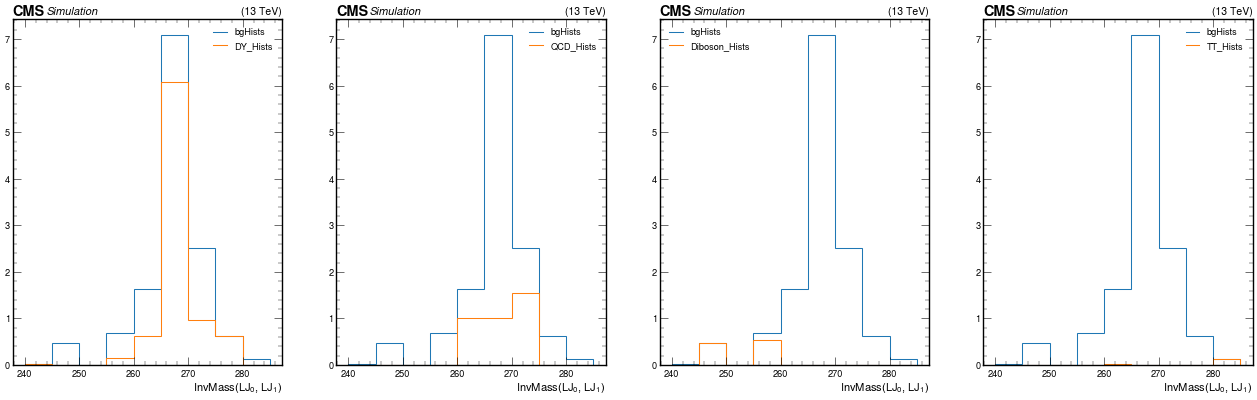

In [32]:
plt.subplots(1,4,figsize=(32,9))
plt.subplot(1,4,1)
utilities.plot([bg_Hists["lj_lj_invmass_lowRange"]["2mu2e", 240j:290j], DY_Hists["lj_lj_invmass_lowRange"]["2mu2e", 240j:290j]], yerr=False, density=False, flow='none')
plt.legend(["bgHists", "DY_Hists"])
plt.subplot(1,4,2)
utilities.plot([bg_Hists["lj_lj_invmass_lowRange"]["2mu2e", 240j:290j], QCD_Hists["lj_lj_invmass_lowRange"]["2mu2e", 240j:290j]], yerr=False, density=False, flow='none')
plt.legend(["bgHists", "QCD_Hists"])
plt.subplot(1,4,3)
utilities.plot([bg_Hists["lj_lj_invmass_lowRange"]["2mu2e", 240j:290j], DiBoson_Hists["lj_lj_invmass_lowRange"]["2mu2e", 240j:290j]], yerr=False, density=False, flow='none')
plt.legend(["bgHists", "Diboson_Hists"])
plt.subplot(1,4,4)
utilities.plot([bg_Hists["lj_lj_invmass_lowRange"]["2mu2e", 240j:290j], TT_Hists["lj_lj_invmass_lowRange"]["2mu2e", 240j:290j]], yerr=False, density=False, flow='none')
plt.legend(["bgHists", "TT_Hists"])

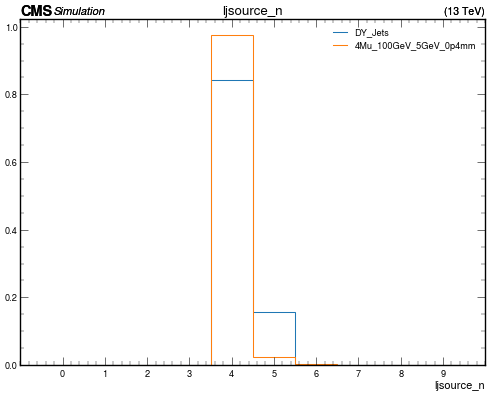

In [33]:
samples_used = ["DY_Jets", "2Mu2E_100GeV_5GeV_0p4mm", "4Mu_100GeV_5GeV_0p4mm"]
hists = ["ljsource_n"]
plotHists(hists, "4mu", False, True, samples_used, False)